**분석 개요**
- 방문자 분석 (unique New IP) 
    - 시간요소별 방문자 수 분석
    - 카테고리별 시간요소별 방문자 수 분석  
    - 시간요소별 방문자 평균 체류시간 (Duration)
- 페이지뷰 분석(not unique New IP)
    - 시간요소별 페이지뷰 분석 
    - 카테고리별 시간요소별 페이지뷰 분석 
- 방문자 세부 분석 (New IP 기준)
    - 일자별 방문자별 평균 사이트 내 이동 수 (unique URL)
    - 일자별 방문자별 카테고리별 개수
- 사이트 세부 분석 (URL 기준)
    - 일자별 사이트별 방문자 수 (unique New IP)
    - 일자별 사이트별 페이지뷰 수 (not unique New IP)
    - 일자별 사이트별 카테고리별 개수 
- 카테고리 세부 분석 (Category 기준)
    - 일자별 카테고리별 방문자 수 (unique New IP)
    - 일자별 카테고리별 페이지뷰 수(not unique New IP)
    - 일자별 카테고리별 고유한 사이트 수 (unique URL)
    - 일자별 카테고리별 사이트 수 (not unique URL) 
    

In [973]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import re

from tqdm import tqdm
tqdm.pandas()

from matplotlib import font_manager, rc

# NanumBarunGothic 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

sns.set_palette('pastel')

In [467]:
df = pd.read_csv('0_preprocessed.csv')
df1 = pd.read_csv('0_duration.csv')
df2 = pd.read_csv('0_base.csv')

In [468]:
data = df.copy()
duration = df1.copy()
base = df2.copy()

In [472]:
#날짜 변수 날짜형으로 바꾸기
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
duration["Timestamp"] = pd.to_datetime(duration["Timestamp"])
base["date"] = pd.to_datetime(base['date'], format='%Y-%m-%d')

In [473]:
#New IP 범주형으로 바꿔주기 
data['New IP'] = data['New IP'].astype(str)
duration['New IP'] = duration['New IP'].astype(str)

In [474]:
print(data.dtypes)
print(duration.dtypes)
print(base.dtypes)

In [475]:
data.isna().sum()

In [476]:
data['URL Search Word'].fillna('NA', inplace=True)
data['Referer'].fillna('NA', inplace=True)
data['Referer Search Word'].fillna('NA', inplace=True)
data['Referer Source'].fillna('NA', inplace=True)
data['User Agent'].fillna('NA', inplace=True)
data['Device'].fillna('NA', inplace=True)

In [477]:
data.isna().sum()

# 전체에서 내부/외부/기타 비율

In [488]:
#banner 삭제 
data = data[data['Category'] != 'banner']

In [489]:
data['Category'].unique()

array(['etc', 'mobile news', 'jobs', 'main', 'news', 'help',
       'social media', 'mobile jobs', 'search', 'magazine',
       'mobile material', 'material', 'photos', 'mobile photos',
       'mobile magazine', 'mobile social media'], dtype=object)

In [490]:
data

,IP,Timestamp,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,User Type,New IP,New Category
1,212.64.214.249,2022-08-02 23:14:11+09:00,lafent.com/wp-json/wp/v2/posts?slug=The%20-Def...,etc,NaN,NaN,NaN,NaN,etc,etc,NaN,crawler; other,미확인,4553,etc
3,204.101.161.19,2022-08-04 20:10:47+09:00,lafent.com/smt_hankukla/index.html,etc,NaN,NaN,NaN,NaN,etc,etc,NaN,crawler; other,미확인,9812,etc
4,1.215.17.66,2022-08-08 15:32:53+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NaN,NaN,NaN,NaN,etc,etc,NaN,crawler; other,미확인,17282,etc
5,1.215.17.66,2022-08-08 15:32:53+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NaN,NaN,NaN,NaN,etc,etc,NaN,crawler; other,미확인,17282,etc
6,1.215.17.66,2022-08-08 15:33:30+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NaN,NaN,NaN,NaN,etc,etc,NaN,crawler; other,미확인,17282,etc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314599,121.170.11.90,2023-07-31 18:44:41+09:00,lafent.com/search/search.html?kwd=(%EC%A3%BC)%...,search,(주)로드파크,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,미확인,1042599,search
14314600,121.170.11.90,2023-07-31 18:44:42+09:00,lafent.com/mtrial/mtr_list.html?mcd=A01&cid=ro...,material,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,미확인,1042599,material
14314601,121.170.11.90,2023-07-31 18:44:43+09:00,lafent.com/mtrial/mtr_list.html?mcd=A01&cid=ro...,material,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,미확인,1042599,material
14314602,121.170.11.90,2023-07-31 18:44:44+09:00,lafent.com/mtrial/mtr_list.html?mcd=A01&cid=ro...,material,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,미확인,1042599,material


In [491]:
del data['User Type']

In [492]:
data.columns

Index(['IP', 'Timestamp', 'URL', 'Category', 'URL Search Word', 'Referer',
       'Referer Search Word', 'Referer Source', 'Referer Category',
       'Referer Content Type', 'User Agent', 'Device', 'New IP',
       'New Category'],
      dtype='object')

In [497]:
crawler = data[data['Device'].str.contains('crawler')]
noncrawler = data[~data['Device'].str.contains('crawler')]

In [498]:
crawler  #기타 

,IP,Timestamp,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category
1,212.64.214.249,2022-08-02 23:14:11+09:00,lafent.com/wp-json/wp/v2/posts?slug=The%20-Def...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,4553,etc
3,204.101.161.19,2022-08-04 20:10:47+09:00,lafent.com/smt_hankukla/index.html,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,9812,etc
4,1.215.17.66,2022-08-08 15:32:53+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,17282,etc
5,1.215.17.66,2022-08-08 15:32:53+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,17282,etc
6,1.215.17.66,2022-08-08 15:33:30+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,17282,etc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314455,38.242.217.78,2023-07-31 18:42:17+09:00,lafent.com/sns/lamrg_view.html?mcd=C01&bsp=C01...,social media,NA,NA,NA,NA,etc,etc,WordPress/6.2.2; https://aodaithanhmai.com.vn/you,crawler; other,1043394,social media
14314512,66.249.79.197,2023-07-31 18:43:13+09:00,lafent.com/mbweb/news/view.html?news_id=123727,mobile news,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,crawler; google,1043595,news
14314554,185.191.171.18,2023-07-31 18:43:57+09:00,lafent.com/sns/photo_list.html?ctf=14&cts=01,social media,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; SemrushBot/7~bl; +htt...,crawler; other,1042847,social media
14314566,66.249.79.196,2023-07-31 18:44:07+09:00,lafent.com/inews/news_list.html?mcd=C03&cb=03,news,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,crawler; google,1043594,news


In [499]:
noncrawler #내부+외부 

,IP,Timestamp,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category
1142,59.18.67.214,2022-08-01 09:00:27+09:00,lafent.com/smt_hgreen/prod/view.html?sn=11901&...,etc,NA,https://www.google.com/,NA,google,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc
1148,72.14.199.216,2022-08-01 09:00:40+09:00,lafent.com/inews/news_view.html?news_id=131047,news,NA,NA,NA,NA,etc,etc,Mediapartners-Google,NA,2197,news
1150,183.98.25.12,2022-08-01 09:00:45+09:00,lafent.com/smt_hgreen/adm/qna_view.html?sn=275...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1182,etc
1152,183.98.25.12,2022-08-01 09:00:50+09:00,lafent.com/smt_hgreen/index.html,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1182,etc
1155,211.223.25.143,2022-08-01 09:00:53+09:00,lafent.com/mbweb/mtrial/view.html?idx=13373,mobile material,NA,https://search.daum.net/search?p=8&q=%EC%82%B0...,산사 농장,daum,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1367,mobile material
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314599,121.170.11.90,2023-07-31 18:44:41+09:00,lafent.com/search/search.html?kwd=(%EC%A3%BC)%...,search,(주)로드파크,NA,NA,NA,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,1042599,search
14314600,121.170.11.90,2023-07-31 18:44:42+09:00,lafent.com/mtrial/mtr_list.html?mcd=A01&cid=ro...,material,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,1042599,material
14314601,121.170.11.90,2023-07-31 18:44:43+09:00,lafent.com/mtrial/mtr_list.html?mcd=A01&cid=ro...,material,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,1042599,material
14314602,121.170.11.90,2023-07-31 18:44:44+09:00,lafent.com/mtrial/mtr_list.html?mcd=A01&cid=ro...,material,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,1042599,material


In [500]:
#내부/외부 분류 
def user_type(row):
    if ('lafent.com' in row['Referer']) | (row['Referer Source'] == 'lafent'):
        return '내부'
    elif ('lafent' in row['Referer Search Word'] or '라펜트' in row['Referer Search Word']):
        return '내부'
    elif ('lafent.com' in row['URL']) and (row['Referer'] == 'NA'):
        return '내부' 
    elif (pd.notna(row['Referer Source'])) and (('other' in row['Referer Source']) or ('google' in row['Referer Source']) or ('daum' in row['Referer Source']) or ('naver' in row['Referer Source'])):
        return '외부'
    else:
        return '기타'

# 'User Type' 칼럼 추가
# noncrawler['User Type'] = noncrawler.apply(user_type, axis=1)

In [501]:
#first_df: 첫 New IP 추출
first_df = noncrawler.groupby(['New IP']).progress_apply(lambda x : x.iloc[0])
first_df.index = [i for i in range(len(first_df))]
first_df['User Type'] = first_df.progress_apply(lambda x : user_type(x), axis = 1)

100%|██████████| 381112/381112 [00:10<00:00, 35563.24it/s]


In [502]:
first_df[first_df['User Type']=='기타']

,IP,Timestamp,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type
2233,104.160.8.40,2023-07-13 04:31:40+09:00,mixo.io%252Fsite%252Fnight-life-in-gang-nam-94...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1004742,etc,기타
2271,107.158.200.56,2023-07-13 05:15:05+09:00,mixo.io%252Fsite%252Fnight-life-in-gang-nam-94...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1004784,etc,기타
2598,146.148.179.167,2023-07-13 21:59:56+09:00,mixo.io%252Fsite%252Fnight-life-in-gang-nam-94...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Macintosh; Intel Mac OS X 12_5) A...,macintosh,1005584,etc,기타
3841,146.148.178.133,2023-07-14 13:05:44+09:00,mixo.io%252Fsite%252Fnight-life-in-gang-nam-94...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (X11; Fedora; Linux x86_64; rv:114...,linux,1007933,etc,기타
4694,139.99.62.124,2023-07-15 05:52:39+09:00,roboimex.com%252Fportfolio-item%252Fshenyangxi...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,linux,1009882,etc,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363945,192.198.127.62,2022-09-11 05:59:43+09:00,technipages.com%2Farticles%2Fbest-free-sexting...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,95671,etc,기타
367577,176.124.204.118,2022-08-04 21:42:22+09:00,rusbanks.info%2Farticle%2FBank-Rossii-predlaga...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,9679,etc,기타
367937,113.116.184.83,2023-06-28 18:33:58+09:00,russiacompany.ru%2Frecent%2Findex.htm%3Furl%3D...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:102.0...,linux,968914,etc,기타
375514,23.105.159.127,2023-07-05 14:21:42+09:00,mixo.io%2Fsite%2Fnight-life-in-gang-nam-94g5u%...,etc,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,windows,988047,etc,기타


In [503]:
#위 열 삭제 
first_df = first_df[first_df['User Type'] != '기타']

In [505]:
first_df['User Type'].unique()

array(['외부', '내부'], dtype=object)

In [514]:
noncrawler = noncrawler.merge(first_df[['New IP', 'User Type']], on = ['New IP'], how = 'left')

In [515]:
#print(df['User Type'].unique())
#df = df.drop(columns = ['User Type'])

In [516]:
noncrawler

,IP,Timestamp,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
0,59.18.67.214,2022-08-01 09:00:27+09:00,lafent.com/smt_hgreen/prod/view.html?sn=11901&...,etc,NA,https://www.google.com/,NA,google,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
1,59.18.67.214,2022-08-01 09:01:55+09:00,lafent.com/smt_hgreen/prod/dsgreq_popup.html?p...,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
2,59.18.67.214,2022-08-01 09:02:56+09:00,lafent.com/smt_hgreen/prod/list.html?tc=04,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
3,59.18.67.214,2022-08-01 09:03:11+09:00,lafent.com/smt_hgreen/prod/view.html?sn=11899&...,etc,NA,http://www.lafent.com/smt_hgreen/prod/list.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
4,59.18.67.214,2022-08-01 09:04:54+09:00,lafent.com/smt_hgreen/prod/list.html?tc=04,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122992,220.87.134.91,2023-07-31 18:38:53+09:00,lafent.com/scrap/scrap_blank.html,etc,NA,http://www.lafent.com/mtrial/mtr_list.html?mcd...,NA,lafent,material,html,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,android,1043272,etc,내부,내부,내부
3122993,220.87.134.91,2023-07-31 18:39:02+09:00,lafent.com/mtrial/mtr_list.html?mcd=A01&cid=en...,material,NA,http://www.lafent.com/mtrial/mtr_list.html?mcd...,NA,lafent,material,html,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,android,1043272,material,내부,내부,내부
3122994,220.87.134.91,2023-07-31 18:39:03+09:00,lafent.com/scrap/scrap_blank.html,etc,NA,http://www.lafent.com/mtrial/mtr_list.html?mcd...,NA,lafent,material,html,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,android,1043272,etc,내부,내부,내부
3122995,112.152.93.31,2023-07-31 18:40:56+09:00,lafent.com/magazine/atc_view.html?news_id=222&...,magazine,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,android,1042272,news,내부,내부,내부


In [517]:
noncrawler['User Type'].unique()

array(['외부', '내부'], dtype=object)

In [518]:
inner_df = noncrawler[noncrawler['User Type'] == '내부']  #내부
outer_df = noncrawler[noncrawler['User Type'] == '외부']  #외부 

In [519]:
inner_df['User Type'].unique()

array(['내부'], dtype=object)

In [520]:
outer_df['User Type'].unique()

array(['외부'], dtype=object)

In [521]:
print(crawler.shape)
print(inner_df.shape)
print(outer_df.shape)

(11029718, 14)
(2318408, 17)
(804589, 17)


**내부에서 외부 추가 분류**

In [776]:
tmp_inner_df = inner_df.copy()
tmp_inner_df = tmp_inner_df.sort_values(by = ['New IP', 'Timestamp'])
first_df = tmp_inner_df.groupby(['New IP']).progress_apply(lambda x : x.iloc[0])

print(round(len(first_df) / 1000))

100%|██████████| 217232/217232 [00:46<00:00, 4646.61it/s]


In [808]:
if ~os.path.isfile('Data_sw/inner_df.csv'):
    pd.DataFrame(columns = first_df.columns).to_csv('Data_sw/inner_df.csv', index = False)

In [809]:
def preprocessingAndSave(first_df, inner_df):
    tmp_df = inner_df[inner_df['New IP'].isin(first_df['New IP'])]
    tmp_df = tmp_df.groupby(['New IP']).apply(lambda x : split_out(x))
    tmp_df.to_csv('Data_sw/inner_df.csv', mode = 'a', index = False, header = False)

In [810]:
#내부 데이터프레임에서 '외부'를 추가적으로 분류
## 조건: Referer Source가 ['NA', 'lafent']가 아닌 것 (즉, ['google', 'naver', 'daum', 'lafent'])을 '외부'로 분류 
def split_out(df):
    # x 는 groupby() Dataframe
    df = df.sort_values(by = ['Timestamp'], ascending = True)
    out = df[df['Referer Source'].apply(lambda x : x not in ['NA', 'lafent'])]
    if len(out) == 0:
        return df
    else:
        df.loc[out.iloc[0].to_frame().T.index[0] : , 'User Type'] = '외부'
        return df

In [811]:
for i in tqdm(range(round(len(first_df) / 1000) + 1)):
    if i == 217:
        df = first_df.iloc[i * 1000:]
        
    else:
        df = first_df.iloc[i * 1000 : (i + 1) * 1000]
    
    preprocessingAndSave(df, inner_df)

100%|██████████| 218/218 [07:06<00:00,  1.96s/it]


In [812]:
result_df = pd.read_csv('Data_sw/inner_df.csv')

/home/wesleyquest/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [813]:
result_df.head(2)

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
0,2022-08-01 14:30:55+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=24596,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부
1,2022-08-01 14:32:14+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=23934,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부


In [814]:
result_df['User Type'].unique()

array(['내부', '외부'], dtype=object)

In [815]:
result_df[result_df['User Type'] == '외부']

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
79,2023-07-11 22:13:21+09:00,112.169.104.53,lafent.com/news2/kitla_view.html?news_id=10024...,etc,NaN,https://www.google.co.kr/,NaN,google,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1000224,news,내부,내부,외부
434,2023-07-11 14:55:20+09:00,119.206.112.165,lafent.com/smt_semin/index.html,etc,NaN,http://www.seminland.co.kr/,NaN,other,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1000602,etc,내부,내부,외부
435,2023-07-11 14:55:25+09:00,119.206.112.165,lafent.com/smt_semin/product/list.html?mc=03,etc,NaN,http://www.lafent.com/smt_semin/index.html,NaN,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1000602,etc,내부,내부,외부
436,2023-07-11 14:55:31+09:00,119.206.112.165,lafent.com/smt_semin/product/list.html?mc=03&p...,etc,NaN,http://www.lafent.com/smt_semin/product/list.h...,NaN,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1000602,etc,내부,내부,외부
437,2023-07-11 14:55:36+09:00,119.206.112.165,lafent.com/smt_semin/product/list.html?mc=03&p...,etc,NaN,http://www.lafent.com/smt_semin/product/list.h...,NaN,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,1000602,etc,내부,내부,외부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318362,2023-07-11 13:09:24+09:00,1.223.232.139,lafent.com/smt_nexus/corp/orgchart.html,etc,NaN,http://www.lafent.com/smt_nexus/corp/greeting....,NaN,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999904,etc,내부,내부,외부
2318363,2023-07-11 13:09:54+09:00,1.223.232.139,lafent.com/jobse/job_view.html?mcd=B01&idx=25267,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999904,jobs,내부,내부,외부
2318364,2023-07-11 13:10:00+09:00,1.223.232.139,lafent.com/jobse/job_view.html?mcd=B01&idx=25274,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999904,jobs,내부,내부,외부
2318365,2023-07-11 13:10:11+09:00,1.223.232.139,lafent.com/jobse/job_view.html?mcd=B01&idx=23251,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999904,jobs,내부,내부,외부


In [816]:
#내부 데이터프레임에서 '외부' 추출
inner_outer = result_df[result_df['User Type'] == '외부']

In [819]:
#위에서 추출한 것을 외부 데이토프레임과 concat => outer_df = outer_df + inner_outer
original = outer_df.copy()
outer_df = pd.concat([original, inner_outer])

In [820]:
print(original.shape)
print(outer_df.shape)

(804589, 17)
(925097, 17)


In [825]:
#내부 데이터프레임 추출 
inner_df = result_df[result_df['User Type'] == '내부']

In [822]:
outer_df['User Type'].unique()

array(['외부'], dtype=object)

In [826]:
inner_df['User Type'].unique()

array(['내부'], dtype=object)

In [827]:
inner_df.shape

(2197900, 17)

In [828]:
noncrawler.shape # 내부 + 외부 

(3122997, 17)

In [830]:
crawler.shape

(11029718, 14)

## 유승우

In [ ]:
outer_df.index = range(len(outer_df))
outer_df.set_index('Timestamp', inplace = True)
outer_df = outer_df.tz_convert('Asia/Seoul')

In [1190]:
outer_df.index = range(len(outer_df))
outer_df.set_index('Timestamp', inplace = True)

In [1191]:
outer_df.head(2)

,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type,month,hour
Timestamp,,,,,,,,,,,,,,,,,,
2022-08-01 00:00:27+00:00,59.18.67.214,lafent.com/smt_hgreen/prod/view.html?sn=11901&...,etc,NA,https://www.google.com/,NA,google,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부,8,0
2022-08-01 00:01:55+00:00,59.18.67.214,lafent.com/smt_hgreen/prod/dsgreq_popup.html?p...,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부,8,0


In [1192]:

# outer_df['Timestamp'] = pd.to_datetime(outer_df['Timestamp'])
outer_df = outer_df.tz_convert('Asia/Seoul')

# , tz='Asia/Seoul'

# dti = dti.tz_localize("UTC")

In [1204]:
inner_df.index = range(len(inner_df))
inner_df.set_index('Timestamp', inplace = True)
inner_df.head(2)

,Timestamp1,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type,month,hour
Timestamp,,,,,,,,,,,,,,,,,,,
2022-08-01 05:30:55+00:00,2022-08-01 14:30:55+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=24596,jobs,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부,8,5
2022-08-01 05:32:14+00:00,2022-08-01 14:32:14+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=23934,jobs,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부,8,5


In [1205]:
inner_df = inner_df.tz_convert('Asia/Seoul')
inner_df = inner_df.reset_index()
inner_df.head(2)

,Timestamp,Timestamp1,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type,month,hour
0,2022-08-01 14:30:55+09:00,2022-08-01 14:30:55+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=24596,jobs,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부,8,5
1,2022-08-01 14:32:14+09:00,2022-08-01 14:32:14+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=23934,jobs,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부,8,5


In [1206]:
inner_df['month'] = inner_df['Timestamp'].dt.month
inner_df['hour'] = inner_df['Timestamp'].dt.hour

In [1207]:
graph01 = inner_df.groupby(['month', 'hour'])['New IP'].nunique().reset_index().pivot_table(index = ['month'], columns = ['hour'], values = ['New IP']).fillna(0)
graph01

New IP                                                        ...        \
hour      0     1     2     3     4     5     6     7     8     9   ...    14   
month                                                               ...         
1       6715  5363  4298  2754  3230  3636  4628  3231  4724  4501  ...  4115   
2        727   483   528   376   223   234   355   626   857  1355  ...  1309   
3        893   575   610   344   370   301   411   629   989  1372  ...  1231   
4        810   566   483   308   365   333   408   576   923  1183  ...  1224   
5        690   515   522   356   323   273   424   583  1026  1202  ...  1326   
6        589   420   434   363   293   243   425   563  1030  1346  ...  1210   
7        545   352   352   237   280   194   365   511   810  1072  ...  1101   
8        617   416   327   276   277   241   339   747  1175  1529  ...  1281   
9        534   443   383   258   246   274   357   655   839  1086  ...  1027   
10       650   568   429   380   345   301   428   652   929  1300  ...  1355   
11       658   525   450   337   336   289   369   593   931  1226  ...  1344   
12       666   664   515   354   345   337   360   610   961  1219  ...  1465   

                                                             
hour     15    16    17    18    19    20    21    22    23  
month                                                        
1      3483  4341  4458  5457  4725  3410  3926  5212  7647  
2      1377  1293  1202  1090   988   850   802   907   699  
3      1409  1518  1337  1058   949  1073   998   937   979  
4      1184  1372  1183   862   878   923   938   831   802  
5      1315  1320  1108  1021   815   874   865   913   737  
6      1192  1167  1064   847   763   756   706   781   736  
7      1159  1107  1051   813   653   771   722   690   609  
8      1309  1305  1328   891   859   846   889   732   689  
9       990   967   932   632   642   630   641   637   646  
10     1283  1264  1250  1032   905   926   891   922   720  
11     1441  1305  1146  1042   949   883   759   754   868  
12     1402  1273  1224   916   993   920   915   951   787  

[12 rows x 24 columns]

In [1208]:
graph01.to_csv('내부 시간대 방문자 수.csv')

In [1194]:
outer_df = outer_df.reset_index()
outer_df.head(2)

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type,month,hour
0,2022-08-01 09:00:27+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/view.html?sn=11901&...,etc,NA,https://www.google.com/,NA,google,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부,8,0
1,2022-08-01 09:01:55+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/dsgreq_popup.html?p...,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부,8,0


In [1196]:
outer_df.groupby(['month', 'hour'])['New IP'].nunique().reset_index().pivot_table(index = ['month'], columns = ['hour'], values = ['New IP']).fillna(0)

New IP                                                ...              \
hour      0    1    2    3    4    5    6    7    8     9   ...    14    15   
month                                                       ...               
1        268  230  171  158  141  137  160  229  429   944  ...  1178  1340   
2        293  223  206  132  171  153  196  248  428   924  ...  1404  1390   
3        600  383  333  317  224  278  327  516  767  1491  ...  1939  1942   
4        476  335  301  230  179  202  274  420  650  1269  ...  1711  1760   
5        459  369  269  213  180  167  195  309  594  1197  ...  1523  1592   
6        419  323  256  207  176  201  295  403  672  1277  ...  1645  1677   
7        319  231  171  129  154  174  244  323  613  1158  ...  1508  1538   
8        294  246  211  162  110  128  219  277  544  1163  ...  1538  1533   
9        376  288  202  127  141  141  175  249  491  1049  ...  1349  1397   
10       367  297  234  177  145  153  229  270  471   974  ...  1380  1368   
11       396  282  232  182  146  162  188  285  497  1080  ...  1495  1496   
12       335  252  208  173  157  181  207  274  486   964  ...  1304  1250   

                                                    
hour     16    17    18   19    20    21   22   23  
month                                               
1      1310  1177   650  474   489   453  411  408  
2      1388  1338   662  553   529   513  459  383  
3      1960  1724  1084  996  1046  1015  939  825  
4      1831  1549   962  827   862   801  727  676  
5      1596  1372   872  709   716   697  637  599  
6      1634  1381   802  700   708   671  637  702  
7      1533  1279   698  526   537   531  525  460  
8      1494  1318   755  586   638   609  582  471  
9      1359  1203   637  585   580   570  547  466  
10     1353  1248   681  602   671   617  549  483  
11     1549  1315   737  626   632   631  600  549  
12     1332  1116   650  558   583   509  520  428  

[12 rows x 24 columns]

In [1197]:
graph = outer_df.groupby(['month', 'hour'])['New IP'].nunique().reset_index().pivot_table(index = ['month'], columns = ['hour'], values = ['New IP']).fillna(0)

In [1198]:
graph.to_csv('외부 시간대 방문자 수.csv')

In [1178]:
outer_df.groupby(['month', 'hour'])['New IP'].nunique().reset_index().pivot_table(index = ['month'], columns = ['hour'], values = ['New IP']).fillna(0)

New IP                                                        ...       \
hour      0     1     2     3     4     5     6     7     8     9   ...   14   
month                                                               ...        
1        944  1126  1098   607  1117  1178  1340  1310  1177   650  ...  408   
2        924  1222  1211   639  1254  1404  1390  1388  1338   662  ...  383   
3       1491  1750  1639  1058  1671  1939  1942  1960  1724  1084  ...  825   
4       1269  1509  1385   922  1493  1711  1760  1831  1549   962  ...  676   
5       1197  1407  1313   806  1420  1523  1592  1596  1372   872  ...  599   
6       1277  1491  1448   878  1422  1645  1677  1634  1381   802  ...  702   
7       1158  1434  1226   761  1386  1508  1538  1533  1279   698  ...  460   
8       1163  1388  1297   909  1338  1538  1533  1494  1318   755  ...  471   
9       1049  1190  1194   763  1174  1349  1397  1359  1203   637  ...  466   
10       974  1224  1177   778  1148  1380  1368  1353  1248   681  ...  483   
11      1080  1286  1285   756  1291  1495  1496  1549  1315   737  ...  549   
12       964  1224  1129   667  1211  1304  1250  1332  1116   650  ...  428   

                                                    
hour    15   16   17   18   19   20   21   22   23  
month                                               
1      278  235  175  163  141  139  163  236  445  
2      291  222  203  133  169  153  197  241  408  
3      600  379  334  315  224  273  322  520  769  
4      478  343  309  228  186  208  280  422  654  
5      463  360  263  223  174  168  199  308  609  
6      411  330  253  195  174  196  284  401  658  
7      309  220  165  125  151  171  243  317  604  
8      309  256  213  164  114  129  224  289  566  
9      372  288  210  129  140  145  174  245  474  
10     369  294  234  176  146  152  243  281  492  
11     393  287  231  191  147  167  174  275  490  
12     329  245  204  165  158  176  206  268  473  

[12 rows x 24 columns]

# 기타('crawler')

In [522]:
crawler

,IP,Timestamp,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category
1,212.64.214.249,2022-08-02 23:14:11+09:00,lafent.com/wp-json/wp/v2/posts?slug=The%20-Def...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,4553,etc
3,204.101.161.19,2022-08-04 20:10:47+09:00,lafent.com/smt_hankukla/index.html,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,9812,etc
4,1.215.17.66,2022-08-08 15:32:53+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,17282,etc
5,1.215.17.66,2022-08-08 15:32:53+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,17282,etc
6,1.215.17.66,2022-08-08 15:33:30+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,17282,etc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314455,38.242.217.78,2023-07-31 18:42:17+09:00,lafent.com/sns/lamrg_view.html?mcd=C01&bsp=C01...,social media,NA,NA,NA,NA,etc,etc,WordPress/6.2.2; https://aodaithanhmai.com.vn/you,crawler; other,1043394,social media
14314512,66.249.79.197,2023-07-31 18:43:13+09:00,lafent.com/mbweb/news/view.html?news_id=123727,mobile news,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,crawler; google,1043595,news
14314554,185.191.171.18,2023-07-31 18:43:57+09:00,lafent.com/sns/photo_list.html?ctf=14&cts=01,social media,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; SemrushBot/7~bl; +htt...,crawler; other,1042847,social media
14314566,66.249.79.196,2023-07-31 18:44:07+09:00,lafent.com/inews/news_list.html?mcd=C03&cb=03,news,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,crawler; google,1043594,news


**크롤러 사이트의 비율**

In [831]:
crawler['Device'].value_counts()

crawler; other       4430033
crawler; google      3006146
crawler; naver       1823645
crawler; daum        1604888
crawler; facebook     165006
Name: Device, dtype: int64

# 전체 = 내부+외부

In [523]:
noncrawler

,IP,Timestamp,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
0,59.18.67.214,2022-08-01 09:00:27+09:00,lafent.com/smt_hgreen/prod/view.html?sn=11901&...,etc,NA,https://www.google.com/,NA,google,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
1,59.18.67.214,2022-08-01 09:01:55+09:00,lafent.com/smt_hgreen/prod/dsgreq_popup.html?p...,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
2,59.18.67.214,2022-08-01 09:02:56+09:00,lafent.com/smt_hgreen/prod/list.html?tc=04,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
3,59.18.67.214,2022-08-01 09:03:11+09:00,lafent.com/smt_hgreen/prod/view.html?sn=11899&...,etc,NA,http://www.lafent.com/smt_hgreen/prod/list.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
4,59.18.67.214,2022-08-01 09:04:54+09:00,lafent.com/smt_hgreen/prod/list.html?tc=04,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122992,220.87.134.91,2023-07-31 18:38:53+09:00,lafent.com/scrap/scrap_blank.html,etc,NA,http://www.lafent.com/mtrial/mtr_list.html?mcd...,NA,lafent,material,html,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,android,1043272,etc,내부,내부,내부
3122993,220.87.134.91,2023-07-31 18:39:02+09:00,lafent.com/mtrial/mtr_list.html?mcd=A01&cid=en...,material,NA,http://www.lafent.com/mtrial/mtr_list.html?mcd...,NA,lafent,material,html,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,android,1043272,material,내부,내부,내부
3122994,220.87.134.91,2023-07-31 18:39:03+09:00,lafent.com/scrap/scrap_blank.html,etc,NA,http://www.lafent.com/mtrial/mtr_list.html?mcd...,NA,lafent,material,html,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,android,1043272,etc,내부,내부,내부
3122995,112.152.93.31,2023-07-31 18:40:56+09:00,lafent.com/magazine/atc_view.html?news_id=222&...,magazine,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,android,1042272,news,내부,내부,내부


# 외부/내부 데이터프레임 정리
- 외부: outer_df (shape: 925097, 17)
- 내부: inner_df (shape: 2197900, 17)

## 내부 

In [832]:
inner_df

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
0,2022-08-01 14:30:55+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=24596,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부
1,2022-08-01 14:32:14+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=23934,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부
2,2022-08-01 14:32:42+09:00,1.220.249.83,lafent.com/jobse/job_list.html?mcd=C11,jobs,NaN,http://www.lafent.com/jobse/job_view.html?mcd=...,NaN,lafent,jobs,html,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부
3,2022-08-01 14:33:07+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C11&idx=21624,jobs,NaN,http://www.lafent.com/jobse/job_list.html?mcd=C11,NaN,lafent,jobs,html,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부
4,2022-08-01 14:33:39+09:00,1.220.249.83,lafent.com/jobse/job_view.html?idx=23470,jobs,NaN,http://www.lafent.com/jobse/job_view.html?mcd=...,NaN,lafent,jobs,html,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318403,2023-07-11 20:42:46+09:00,1.237.108.8,lafent.com/jobse/job_view.html?mcd=B01&idx=25323,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (iPhone; CPU iPhone OS 16_5_1 like...,iphone,999920,jobs,내부,내부,내부
2318404,2023-07-11 20:45:41+09:00,110.35.181.162,lafent.com/mbweb/magazine/view.html?news_id=13...,mobile magazine,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999998,news,내부,내부,내부
2318405,2023-07-11 22:15:52+09:00,1.237.93.138,lafent.com/jobse/job_view.html?mcd=B01&idx=25319,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,iphone,999921,jobs,내부,내부,내부
2318406,2023-07-11 22:36:46+09:00,110.10.219.36,lafent.com/inews/index.html,news,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999990,news,내부,내부,내부


## 외부 

In [833]:
outer_df

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
2022-08-01 09:00:27+09:00,2022-08-01 09:00:27+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/view.html?sn=11901&...,etc,NA,https://www.google.com/,NA,google,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
2022-08-01 09:01:55+09:00,2022-08-01 09:01:55+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/dsgreq_popup.html?p...,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
2022-08-01 09:02:56+09:00,2022-08-01 09:02:56+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/list.html?tc=04,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
2022-08-01 09:03:11+09:00,2022-08-01 09:03:11+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/view.html?sn=11899&...,etc,NA,http://www.lafent.com/smt_hgreen/prod/list.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
2022-08-01 09:04:54+09:00,2022-08-01 09:04:54+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/list.html?tc=04,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318362,2023-07-11 13:09:24+09:00,1.223.232.139,lafent.com/smt_nexus/corp/orgchart.html,etc,NaN,http://www.lafent.com/smt_nexus/corp/greeting....,NaN,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999904,etc,내부,내부,외부
2318363,2023-07-11 13:09:54+09:00,1.223.232.139,lafent.com/jobse/job_view.html?mcd=B01&idx=25267,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999904,jobs,내부,내부,외부
2318364,2023-07-11 13:10:00+09:00,1.223.232.139,lafent.com/jobse/job_view.html?mcd=B01&idx=25274,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999904,jobs,내부,내부,외부
2318365,2023-07-11 13:10:11+09:00,1.223.232.139,lafent.com/jobse/job_view.html?mcd=B01&idx=23251,jobs,NaN,NaN,NaN,NaN,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,windows,999904,jobs,내부,내부,외부


## 추가 전처리 
- Search Word에서 디코딩 작업

In [839]:
inner_df.isna().sum()

Timestamp                     0
IP                            0
URL                           0
Category                      0
URL Search Word         2148150
Referer                 1681297
Referer Search Word     2177562
Referer Source          1681297
Referer Category              0
Referer Content Type          0
User Agent                    0
Device                    93661
New IP                        0
New Category                  0
User Type_x                   0
User Type_y                   0
User Type                     0
dtype: int64

In [840]:
inner_df['URL Search Word'].fillna('NA', inplace=True)
inner_df['Referer'].fillna('NA', inplace=True)
inner_df['Referer Search Word'].fillna('NA', inplace=True)
inner_df['Referer Source'].fillna('NA', inplace=True)
inner_df['Device'].fillna('NA', inplace=True)

/home/wesleyquest/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [841]:
inner_df.isna().sum()

Timestamp               0
IP                      0
URL                     0
Category                0
URL Search Word         0
Referer                 0
Referer Search Word     0
Referer Source          0
Referer Category        0
Referer Content Type    0
User Agent              0
Device                  0
New IP                  0
New Category            0
User Type_x             0
User Type_y             0
User Type               0
dtype: int64

In [842]:
outer_df.isna().sum()

Timestamp                    0
IP                           0
URL                          0
Category                     0
URL Search Word         118764
Referer                  19969
Referer Search Word     116019
Referer Source           19969
Referer Category             0
Referer Content Type         0
User Agent                   0
Device                      66
New IP                       0
New Category                 0
User Type_x                  0
User Type_y                  0
User Type                    0
dtype: int64

In [844]:
outer_df['URL Search Word'].fillna('NA', inplace=True)
outer_df['Referer'].fillna('NA', inplace=True)
outer_df['Referer Search Word'].fillna('NA', inplace=True)
outer_df['Referer Source'].fillna('NA', inplace=True)
outer_df['Device'].fillna('NA', inplace=True)

In [845]:
outer_df.isna().sum()

Timestamp               0
IP                      0
URL                     0
Category                0
URL Search Word         0
Referer                 0
Referer Search Word     0
Referer Source          0
Referer Category        0
Referer Content Type    0
User Agent              0
Device                  0
New IP                  0
New Category            0
User Type_x             0
User Type_y             0
User Type               0
dtype: int64

In [883]:
inner_df.head(2)

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
0,2022-08-01 14:30:55+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=24596,jobs,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부
1,2022-08-01 14:32:14+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=23934,jobs,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부


In [887]:
# condition_referer = inner_df['Referer Search Word'].apply(lambda x : '\\\\' in x)
# condition_url = inner_df['URL Search Word'].apply(lambda x : '\\\\' in x)

In [888]:
inner_df[condition_url]

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
3072,2023-07-12 08:52:30+09:00,112.149.173.224,lafent.com/search/search.html?kwd=\\xb0\\xf8\\...,search,\\xb0\\xf8\\xb5\\xbf\\xc1\\xd6\\xc5\\xc3,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1002373,search,내부,내부,내부
3073,2023-07-12 08:52:30+09:00,112.149.173.224,lafent.com/search/search.html?kwd=\\xb0\\xf8\\...,search,\\xb0\\xf8\\xb5\\xbf\\xc1\\xd6\\xc5\\xc3,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1002373,search,내부,내부,내부
3715,2023-07-12 09:57:45+09:00,121.67.196.1,lafent.com/search/search.html?smc=a01&kwd=\\xb...,search,\\xb3\\xec\\xc8\\xad,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1002852,search,내부,내부,내부
3716,2023-07-12 09:57:45+09:00,121.67.196.1,lafent.com/search/search.html?smc=a01&kwd=\\xb...,search,\\xb3\\xec\\xc8\\xad,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1002852,search,내부,내부,내부
4376,2023-07-12 14:55:36+09:00,182.227.106.150,lafent.com/search/search.html?kwd=\\xc0\\xda\\...,search,\\xc0\\xda\\xbf\\xac\\xc0\\xaf\\xbb\\xea\\xb9\...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1003573,search,내부,내부,내부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315943,2022-09-13 09:27:06+09:00,211.107.140.61,lafent.com/search/search.html?kwd=\\xc7\\xc1\\...,search,\\xc7\\xc1\\xb6\\xfb\\xbd\\xba \\xc0\\xaf\\xc7...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,99810,search,내부,내부,내부
2316477,2023-07-10 19:19:55+09:00,121.190.114.79,lafent.com/search/search.html?smc=a01&kwd=\\xb...,search,\\xb3\\xee\\xc0\\xcc\\xbd\\xc3\\xbc\\xb3\\xb9\...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,998545,search,내부,내부,내부
2316478,2023-07-10 19:19:55+09:00,121.190.114.79,lafent.com/search/search.html?smc=a01&kwd=\\xb...,search,\\xb3\\xee\\xc0\\xcc\\xbd\\xc3\\xbc\\xb3\\xb9\...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,998545,search,내부,내부,내부
2317801,2023-07-10 11:29:10+09:00,222.100.37.185,lafent.com/search/search.html?kwd=\\xbc\\xd2\\...,search,\\xbc\\xd2\\xb3\\xaa\\xb9\\xab \\xc0\\xce\\xc1...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,999488,search,내부,내부,내부


In [889]:
inner_df[condition_referer]

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
70101,2022-09-18 22:50:11+09:00,52.162.211.179,lafent.com/searchKonan/akc.html,etc,NA,http://www.lafent.com/search/search.html?kwd=\...,\\xc3\\x83\\xc2\\xac\\xc3\\x82\\xcb\\x9c\\xc3\...,lafent,search,html,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,windows,112985,etc,내부,내부,내부
70356,2022-08-01 16:15:43+09:00,175.198.220.27,lafent.com/searchKonan/akc.html,etc,NA,http://www.lafent.com/search/search.html?kwd=\...,\\xec\\x93\\xb0\\xeb\\xa0\\x88\\xea\\xb8\\xb0\...,lafent,search,html,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1132,etc,내부,내부,내부
70359,2022-08-01 16:17:20+09:00,175.198.220.27,lafent.com/searchKonan/akc.html,etc,NA,http://www.lafent.com/search/search.html?kwd=\...,\\xec\\x93\\xb0\\xeb\\xa0\\x88\\xea\\xb8\\xb0\...,lafent,search,html,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1132,etc,내부,내부,내부
70366,2022-08-01 16:42:37+09:00,175.198.220.27,lafent.com/searchKonan/akc.html,etc,NA,http://www.lafent.com/search/search.html?kwd=\...,\\xec\\x93\\xb0\\xeb\\xa0\\x88\\xea\\xb8\\xb0,lafent,search,html,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1132,etc,내부,내부,내부
70369,2022-08-01 16:42:43+09:00,175.198.220.27,lafent.com/searchKonan/akc.html,etc,NA,http://www.lafent.com/search/search.html?kwd=\...,\\xec\\x93\\xb0\\xeb\\xa0\\x88\\xea\\xb8\\xb0,lafent,search,html,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1132,etc,내부,내부,내부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295833,2023-07-02 08:29:25+09:00,77.219.3.104,lafent.com/search/search.html?kwd=\\xed\\x8a\\...,search,\\xed\\x8a\\xb8\\xeb\\xa0\\x90\\xeb\\xa6\\xac\...,http://www.lafent.com/search/search.html?kwd=\...,\\xed\\x8a\\xb8\\xeb\\xa0\\x90\\xeb\\xa6\\xac\...,lafent,search,html,Mozilla/53.330 (Windows NT 10.0; WOW64; Rv:50....,windows,980934,search,내부,내부,내부
2295834,2023-07-02 08:29:27+09:00,77.219.3.104,lafent.com/search/search.html?kwd=\\xed\\x8a\\...,search,\\xed\\x8a\\xb8\\xeb\\xa0\\x90\\xeb\\xa6\\xac\...,http://www.lafent.com/search/search.html?kwd=\...,\\xed\\x8a\\xb8\\xeb\\xa0\\x90\\xeb\\xa6\\xac\...,lafent,search,html,Mozilla/53.330 (Windows NT 10.0; WOW64; Rv:50....,windows,980934,search,내부,내부,내부
2295835,2023-07-02 08:29:28+09:00,77.219.3.104,lafent.com/search/search.html?kwd=\\xed\\x8a\\...,search,\\xed\\x8a\\xb8\\xeb\\xa0\\x90\\xeb\\xa6\\xac\...,http://www.lafent.com/search/search.html?kwd=\...,\\xed\\x8a\\xb8\\xeb\\xa0\\x90\\xeb\\xa6\\xac\...,lafent,search,html,Mozilla/53.330 (Windows NT 10.0; WOW64; Rv:50....,windows,980934,search,내부,내부,내부
2295836,2023-07-02 08:29:30+09:00,77.219.3.104,lafent.com/search/search.html?kwd=\\xed\\x8a\\...,search,\\xed\\x8a\\xb8\\xeb\\xa0\\x90\\xeb\\xa6\\xac\...,http://www.lafent.com/search/search.html?kwd=\...,\\xed\\x8a\\xb8\\xeb\\xa0\\x90\\xeb\\xa6\\xac\...,lafent,search,html,Mozilla/53.330 (Windows NT 10.0; WOW64; Rv:50....,windows,980934,search,내부,내부,내부


In [ ]:
# code_points = [int(cp, 16) for cp in escaped_str.split('\\\\x')[1:]]

# # 각 코드 포인트를 bytes로 변환하고 이를 utf-8로 디코딩
# # byte_data = bytes(code_points)
# decoded_str = byte_data.decode('cp949')

In [1019]:
# def decode(value):
#     value = re.sub(r'[^\\\\a-z0-9]', '', value)
    
#     if '\\\\' in value:
#         try:        
#             code_points = [int(cp, 16) for cp in value.split('\\\\x')[1:]]
#             byte_data = bytes(code_points).decode('cp949')
#             return byte_data
#         except:
#             result = codecs.escape_decode(bytes(value, 'utf-8'))[0].decode('utf-8')
#             print(result)
#             return result
#     else:
#         return value

In [1020]:
#import codecs

In [1021]:
# escaped_str = '\\\\xbd\\\\xba\\\\xc7\\\\xc1\\\\xb8\\\\xb5\\\\xc5\\\\xac\\\\xb7\\\\xaf'
# decode(escaped_str)

'스프링클러'

In [656]:
# escaped_str = '\\\\xbd\\\\xba\\\\xc7\\\\xc1\\\\xb8\\\\xb5\\\\xc5\\\\xac\\\\xb7\\\\xaf'

# # '\\'을 기준으로 문자열을 split하고, 16진수를 10진수로 변환하여 리스트로 만듦
# code_points = [int(cp, 16) for cp in escaped_str.split('\\\\x')[1:]]

# # 각 코드 포인트를 bytes로 변환하고 이를 utf-8로 디코딩
# byte_data = bytes(code_points)
# decoded_str = byte_data.decode('cp949')

# print(decoded_str)

스프링클러


In [638]:
# inner_df[(inner_df['URL'].str.contains('lafent')) & (inner_df['URL Search Word'] != 'NA')].iloc[1]['URL Search Word']

'\\\\xbd\\\\xba\\\\xc7\\\\xc1\\\\xb8\\\\xb5\\\\xc5\\\\xac\\\\xb7\\\\xaf'

In [653]:
# tmp_list = [int(cp, 16) for cp in inner_df[(inner_df['URL'].str.contains('lafent')) & (inner_df['URL Search Word'] != 'NA')].iloc[1]['URL Search Word'].split('\\\\x')[1:]]
# # tmp_list = [int(cp, 16) for cp in tmp_list]
# decoded_str = ''.join([chr(cp) for cp in tmp_list])
# print(decoded_str)

½ºÇÁ¸µÅ¬·¯


In [846]:
# inner_df[(inner_df['URL Search Word'].str.contains(r'\\'))]

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type
3072,2023-07-12 08:52:30+09:00,112.149.173.224,lafent.com/search/search.html?kwd=\\xb0\\xf8\\...,search,\\xb0\\xf8\\xb5\\xbf\\xc1\\xd6\\xc5\\xc3,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1002373,search,내부,내부,내부
3073,2023-07-12 08:52:30+09:00,112.149.173.224,lafent.com/search/search.html?kwd=\\xb0\\xf8\\...,search,\\xb0\\xf8\\xb5\\xbf\\xc1\\xd6\\xc5\\xc3,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1002373,search,내부,내부,내부
3715,2023-07-12 09:57:45+09:00,121.67.196.1,lafent.com/search/search.html?smc=a01&kwd=\\xb...,search,\\xb3\\xec\\xc8\\xad,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1002852,search,내부,내부,내부
3716,2023-07-12 09:57:45+09:00,121.67.196.1,lafent.com/search/search.html?smc=a01&kwd=\\xb...,search,\\xb3\\xec\\xc8\\xad,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1002852,search,내부,내부,내부
4376,2023-07-12 14:55:36+09:00,182.227.106.150,lafent.com/search/search.html?kwd=\\xc0\\xda\\...,search,\\xc0\\xda\\xbf\\xac\\xc0\\xaf\\xbb\\xea\\xb9\...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,1003573,search,내부,내부,내부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315943,2022-09-13 09:27:06+09:00,211.107.140.61,lafent.com/search/search.html?kwd=\\xc7\\xc1\\...,search,\\xc7\\xc1\\xb6\\xfb\\xbd\\xba \\xc0\\xaf\\xc7...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,99810,search,내부,내부,내부
2316477,2023-07-10 19:19:55+09:00,121.190.114.79,lafent.com/search/search.html?smc=a01&kwd=\\xb...,search,\\xb3\\xee\\xc0\\xcc\\xbd\\xc3\\xbc\\xb3\\xb9\...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,998545,search,내부,내부,내부
2316478,2023-07-10 19:19:55+09:00,121.190.114.79,lafent.com/search/search.html?smc=a01&kwd=\\xb...,search,\\xb3\\xee\\xc0\\xcc\\xbd\\xc3\\xbc\\xb3\\xb9\...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,998545,search,내부,내부,내부
2317801,2023-07-10 11:29:10+09:00,222.100.37.185,lafent.com/search/search.html?kwd=\\xbc\\xd2\\...,search,\\xbc\\xd2\\xb3\\xaa\\xb9\\xab \\xc0\\xce\\xc1...,NA,NA,NA,etc,etc,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,windows,999488,search,내부,내부,내부


In [ ]:
# inner_df[(inner_df['URL'].str.contains('lafent')) & (inner_df['URL Search Word'] != 'NA')]

In [627]:
# inner_df[(inner_df['URL'].str.contains('lafent')) & (inner_df['URL Search Word'] != 'NA')].iloc[1]['URL']

'lafent.com/search/search.html?smc=a01&x=0&y=0&kwd=\\\\xbd\\\\xba\\\\xc7\\\\xc1\\\\xb8\\\\xb5\\\\xc5\\\\xac\\\\xb7\\\\xaf'

In [625]:
# inner_df[(inner_df['URL'].str.contains('lafent')) & (inner_df['URL Search Word'] != 'NA')].iloc[1]['URL Search Word']

'\\\\xbd\\\\xba\\\\xc7\\\\xc1\\\\xb8\\\\xb5\\\\xc5\\\\xac\\\\xb7\\\\xaf'

In [1079]:
#일단 디코드 안된 애들 삭제
inner01 = inner_df.copy()
inner01 = inner01[~inner01['URL Search Word'].str.contains(r'\\')]
inner01 = inner01[~inner01['Referer Search Word'].str.contains(r'\\')]

outer01 = outer_df.copy()
outer01 = outer01[~outer01['URL Search Word'].str.contains(r'\\')]
outer01 = outer01[~outer01['Referer Search Word'].str.contains(r'\\')]

noncrawler01 = noncrawler.copy()
noncrawler01 = noncrawler01[~noncrawler01['URL Search Word'].str.contains(r'\\')]
noncrawler01 = noncrawler01[~noncrawler01['Referer Search Word'].str.contains(r'\\')]

In [1131]:
#디코드 안된 애들 저장 
inner_dc = inner_df.copy()
inner_dc = inner_dc[inner_dc['URL Search Word'].str.contains(r'\\')]
inner_dc = inner_dc[inner_dc['Referer Search Word'].str.contains(r'\\')]

outer_dc = outer_df.copy()
outer_dc = outer_dc[outer_dc['URL Search Word'].str.contains(r'\\')]
outer_dc = outer_dc[outer_dc['Referer Search Word'].str.contains(r'\\')]

noncrawler_dc = noncrawler.copy()
noncrawler_dc = noncrawler_dc[noncrawler_dc['URL Search Word'].str.contains(r'\\')]
noncrawler_dc = noncrawler_dc[noncrawler_dc['Referer Search Word'].str.contains(r'\\')]

In [1132]:
inner_dc.to_csv('inner_decode.csv', index=False)
outer_dc.to_csv('outer_decode.csv', index=False)
noncrawler_dc.to_csv('noncrawler_decode.csv', index=False)

# 검색어 분석

In [1259]:
#datetime utc -> tz(Asia/Seoul)로 바꾸기
outer01.index = range(len(outer01))
outer01.set_index('Timestamp', inplace = True)
outer01 = outer01.tz_convert('Asia/Seoul')

In [1262]:
outer01 = outer01.reset_index()

In [1265]:
outer01['month'] = outer01['Timestamp'].dt.month
outer01['day'] = outer01['Timestamp'].dt.day
outer01['hour'] = outer01['Timestamp'].dt.hour

In [1268]:
#datetime utc -> tz(Asia/Seoul)로 바꾸기
inner01.index = range(len(inner01))
inner01.set_index('Timestamp', inplace = True)
inner01 = inner01.tz_convert('Asia/Seoul')

inner01 = inner01.reset_index()

inner01['month'] = inner01['Timestamp'].dt.month
inner01['day'] = inner01['Timestamp'].dt.day
inner01['hour'] = inner01['Timestamp'].dt.hour

**키워드 빈도수**

In [1274]:
outer_refer = outer01['Referer Search Word'].value_counts()
outer_refer = pd.DataFrame(outer_refer)
outer_refer

,Referer Search Word
NA,860978
잔디보호매트,1083
벤치,959
파고라,661
공모전,636
...,...
새로운 한국수목 대백과 도감,1
입체적 활용,1
천마이앤씨 토목,1
Leopold 조경,1


In [1275]:
outer_url = outer01['URL Search Word'].value_counts()
outer_url = pd.DataFrame(outer_url)
outer_url

,URL Search Word
NA,911434
벤치,492
파고라,293
공모전,290
엔지니어링,187
...,...
정진용,1
gfrc,1
FNQJ,1
어정희,1


In [1276]:
inner_refer = inner01['Referer Search Word'].value_counts()
inner_refer = pd.DataFrame(inner_refer)
inner_refer

,Referer Search Word
NA,2174850
http://www.lafent.com/jobse/index.html,274
조경,267
엔지니어링,221
공모전,160
...,...
임광성교수,1
부천대학교 임광성,1
체육관 탄성포장재,1
미국 기술사 한국기술사 인정,1


In [1277]:
inner_url = inner01['Referer Search Word'].value_counts()
inner_url = pd.DataFrame(inner_url)
inner_url

,Referer Search Word
NA,2174850
http://www.lafent.com/jobse/index.html,274
조경,267
엔지니어링,221
공모전,160
...,...
임광성교수,1
부천대학교 임광성,1
체육관 탄성포장재,1
미국 기술사 한국기술사 인정,1


In [1278]:
outer_refer.to_csv('outer_refer.csv')

### 유승우: 검색어 분석: 2023/09/21 15:39

In [1291]:
outer01_sw = outer01.copy()
inner01_sw = inner01.copy()

outer01_sw.drop(columns = ['User Type_x', 'User Type_y'], inplace = True)
inner01_sw.drop(columns = ['User Type_x', 'User Type_y'], inplace = True)

total_sw = pd.concat([outer01, inner01], axis = 0, ignore_index = True)
total_sw = total_sw[(total_sw['Referer Search Word'] != 'NA') | (total_sw['URL Search Word'] != 'NA')]

In [1303]:
base_columns = ['IP', 'Timestamp', 'URL', 'URL Search Word', 'Referer', 'Referer Search Word', 'Referer Source', 'Device', 'New IP', 'User Type', 'month', 'day', 'hour']

### 작업 순서
1. 외부에서, firstOutWord를 찾아야함
2. 외부에서, outWord를 찾아야함
3. 1~2 번 결과물을 합쳐 out_keyword(dataframe)을 만들어야 함
4. out_keyword에서 중복인 녀석들을 찾아 제거해야 함
    * 여기서 중복인 녀석들이란, 연속된 키워드를 의미하며,동일 일자 및 동일 IP임
    * index 하나 옮겨서, 만들면 될거 같기도 하다.
5. 내부에서, innerWord를 찾아야함
6. inner_word에서 중복인 녀석들 제거해야 함

In [1431]:
firstOutWord_df = total_sw[total_sw['User Type'] == '외부']
firstOutWord_df = firstOutWord_df[(firstOutWord_df['Referer Search Word'] != 'NA') & (firstOutWord_df['Referer Source'] != 'lafent')]
firstOutWord_df = firstOutWord_df[base_columns]
firstOutWord_df['category'] = 'firstOutWord'

In [1432]:
outWord_df = total_sw[total_sw['User Type'] == '외부']
outWord_df = outWord_df[(outWord_df['Referer Source'] == 'lafent') & (outWord_df['URL Search Word'] != 'NA')]
outWord_df = outWord_df[base_columns]
outWord_df['category'] = 'outWord'

In [1433]:
out_keyword = pd.concat([firstOutWord_df, outWord_df], axis = 0, ignore_index = True)
out_keyword = out_keyword.sort_values(by = ['IP', 'Timestamp'])
out_keyword.index = range(len(out_keyword))
out_keyword['index'] = out_keyword.index

In [1453]:
innerWord_df = total_sw[total_sw['User Type'] == '내부']
innerWord_df = innerWord_df[(innerWord_df['Referer Source'] == 'lafent') & (innerWord_df['URL Search Word'] != 'NA')]
innerWord_df = innerWord_df[base_columns]
innerWord_df['category'] = 'innerWord'
innerWord_df = innerWord_df.sort_values(by = ['IP', 'Timestamp'])
innerWord_df.index = range(len(innerWord_df))
innerWord_df['index'] = innerWord_df.index

In [1436]:
if ~os.path.isfile('Data_sw/out_keyword.csv'):
    pd.DataFrame(columns = out_keyword.columns).to_csv('Data_sw/out_keyword.csv')

In [1450]:
def removeDuplicates01(groupby, path = 'Data_sw/out_keyword.csv'):
    if len(groupby) == 1:
        groupby.reset_index(drop = True).to_csv(path,
                                     index = False,
                                     header = False,
                                     mode = 'a')
    else:
        tmp01 = groupby[groupby['category'] == 'firstOutWord']
        tmp01 = tmp01.groupby(['Referer Search Word']).apply(lambda x : remove(x)).reset_index(drop = True)

        tmp02 = groupby[groupby['category'] == 'outWord']
        tmp02 = tmp02.groupby(['URL Search Word']).apply(lambda x : remove(x)).reset_index(drop = True)
        pd.concat([tmp01, tmp02], axis = 0).to_csv(path,
                                                   index = False,
                                                   header = False,
                                                   mode = 'a')
#         return 

In [1425]:
def remove(groupby):    
    index01 = groupby['index'].tolist()
    index02 = [i + 1 for i in index01]

    deleteIndex = list(set(index01).intersection(set(index02)))

    if len(deleteIndex) == 0:
        return groupby
    else:
        groupby = groupby[~groupby['index'].isin(deleteIndex)]
        return groupby

In [1437]:
out_keyword.groupby(['New IP']).progress_apply(lambda x : removeDuplicates01(x.reset_index(drop = True)))
out_keywords = pd.read_csv('Data_sw/out_keyword.csv')
# out_keywords = out_keywords.iloc[:, :-1]
# out_keywords.columns = out_keyword.columns
# out_keywords.to_csv('Data_sw/out_keyword.csv', index = False)

100%|██████████| 31915/31915 [01:03<00:00, 501.45it/s]


""


In [1448]:
out_keywords.head(2)

,IP,Timestamp,URL,URL Search Word,Referer,Referer Search Word,Referer Source,Device,New IP,User Type,month,day,hour,category,index
0,1.215.17.66,2022-08-01 15:31:08+09:00,lafent.com/mbweb/news/view.html?news_id=114353,NaN,https://search.naver.com/search.naver?sm=tab_h...,행복도시 생활권별 가로수,naver,windows,7,외부,8,1,15,firstOutWord,165
1,1.244.75.12,2022-08-01 14:59:33+09:00,lafent.com/jobse/job_view.html?mcd=A01&idx=24809,NaN,https://m.search.naver.com/search.naver?page=3...,조경사무소 루다,naver,iphone,29,외부,8,1,14,firstOutWord,1230


In [1458]:
def removeDuplicates02(groupby, path = 'Data_sw/out_keyword.csv'):
    if len(groupby) == 1:
        groupby.reset_index(drop = True).to_csv(path,
                                     index = False,
                                     header = False,
                                     mode = 'a')
    else:
        
        groupby = groupby.groupby(['Referer Search Word']).apply(lambda x : remove(x)).reset_index(drop = True)
        groupby.to_csv(path,
                       index = False,
                       header = False,
                       mode = 'a')

In [1456]:
def remove(groupby):    
    index01 = groupby['index'].tolist()
    index02 = [i + 1 for i in index01]

    deleteIndex = list(set(index01).intersection(set(index02)))

    if len(deleteIndex) == 0:
        return groupby
    else:
        groupby = groupby[~groupby['index'].isin(deleteIndex)]
        return groupby

In [1462]:
if ~os.path.isfile('Data_sw/inner_keyword.csv'):
    pd.DataFrame(columns = innerWord_df.columns).to_csv('Data_sw/inner_keyword.csv')

In [1463]:
innerWord_df.groupby(['New IP']).progress_apply(lambda x : removeDuplicates02(x.reset_index(drop = True), path = 'Data_sw/inner_keyword.csv'))

100%|██████████| 2201/2201 [00:05<00:00, 393.40it/s]


""


In [1465]:
inner_keywords = pd.read_csv('Data_sw/inner_keyword.csv')
# inner_keywords = inner_keywords.iloc[:, :-1]
# inner_keywords.columns = innerWord_df.columns
# inner_keywords.to_csv('Data_sw/inner_keyword.csv', index = False)

In [1468]:
keywords_df = pd.concat([inner_keywords, out_keywords], axis = 0, ignore_index = True)
keywords_df = keywords_df.drop(columns = ['index'])

### firstOuterWords 빈도 분석

In [1473]:
df = keywords_df.copy()
df = df[df['category'] == 'firstOutWord']

In [1477]:
df.head(2)

,IP,Timestamp,URL,URL Search Word,Referer,Referer Search Word,Referer Source,Device,New IP,User Type,month,day,hour,category
4056,1.215.17.66,2022-08-01 15:31:08+09:00,lafent.com/mbweb/news/view.html?news_id=114353,NaN,https://search.naver.com/search.naver?sm=tab_h...,행복도시 생활권별 가로수,naver,windows,7,외부,8,1,15,firstOutWord
4057,1.244.75.12,2022-08-01 14:59:33+09:00,lafent.com/jobse/job_view.html?mcd=A01&idx=24809,NaN,https://m.search.naver.com/search.naver?page=3...,조경사무소 루다,naver,iphone,29,외부,8,1,14,firstOutWord


In [1483]:
df.groupby(['Referer Search Word'])['IP'].count().sort_values(ascending = False).reset_index().to_csv('Data_sw/최초키워드_순서.csv',
                                                                                                      index = False,
                                                                                                      encoding = 'utf-8-sig')

In [ ]:
# 최초 키워드 순서

### innerWords 빈도 분석

In [1484]:
df = keywords_df.copy()
df = df[df['category'] == 'innerWord']

In [1485]:
df.head(2)

,IP,Timestamp,URL,URL Search Word,Referer,Referer Search Word,Referer Source,Device,New IP,User Type,month,day,hour,category
0,112.147.187.71,2023-07-11 23:13:46+09:00,lafent.com/search/search.html?kwd=%EC%A3%BC%EC...,주식회사 아영,http://www.lafent.com/jobse/job_view.html?mcd=...,NaN,lafent,windows,1000207,내부,7,11,23,innerWord
1,112.147.187.71,2023-07-11 23:13:51+09:00,lafent.com/search/search.html?kwd=%EC%95%84%EC...,아영,http://www.lafent.com/search/search.html?kwd=%...,주식회사 아영,lafent,windows,1000207,내부,7,11,23,innerWord


In [1486]:
df.groupby(['URL Search Word'])['IP'].count().sort_values(ascending = False).reset_index().to_csv('Data_sw/내부키워드_순서.csv',
                                                                                                   index = False,
                                                                                                   encoding ='utf-8-sig')

In [1494]:
df = keywords_df.copy()

In [1495]:
df[df['Referer Source'] == 'google']

,IP,Timestamp,URL,URL Search Word,Referer,Referer Search Word,Referer Source,Device,New IP,User Type,month,day,hour,category
4060,106.240.39.146,2022-08-02 11:40:04+09:00,lafent.com/mbweb/news/view.html?news_id=74675,NaN,https://www.google.com/search?q=%EC%84%9C%EC%9...,서울시 생태면적률 의무,google,windows,2301,외부,8,2,11,firstOutWord
4061,112.219.157.139,2022-08-02 10:13:12+09:00,lafent.com/smt_ca/prod/rstview.html?sn=14330&m...,NaN,https://www.google.com/search?q=%EC%97%90%EC%B...,에코델타 마스터플랜,google,windows,2567,외부,8,2,10,firstOutWord
4066,175.212.148.226,2022-08-02 05:32:14+09:00,lafent.com/sns/agrbrd_view.html?mcd=A01&bsp=Q0...,NaN,https://www.google.co.kr/search?q=%EA%B3%B5%EB...,공무원 녹지직,google,windows,3945,외부,8,2,5,firstOutWord
4087,59.10.194.91,2022-08-04 18:03:36+09:00,lafent.com/smt_semin/product/view.html?sn=1025...,NaN,https://www.google.co.kr/search?q=smb-3004&bih...,smb-3004,google,windows,10765,외부,8,4,18,firstOutWord
4142,1.238.138.140,2022-08-24 16:50:56+09:00,lafent.com/smt_hgreen/prod/view.html?sn=8864&t...,NaN,https://www.google.com/search?q=%EC%97%98%EB%B...,엘브엣지,google,windows,56339,외부,8,24,16,firstOutWord
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37493,222.109.214.158,2023-06-28 17:42:18+09:00,lafent.com/mbweb/news/view.html?news_id=118636,NaN,https://www.google.com/search?q=%ED%85%8C%EB%9...,테라코타 입면,google,windows,970782,외부,6,28,17,firstOutWord
37545,119.197.40.91,2023-06-29 07:41:43+09:00,lafent.com/mbweb/news/view.html?news_id=113069...,NaN,https://www.google.com/search?q=%EB%B3%B4%EA%B...,보강토옹벽 개념,google,windows,972041,외부,6,29,7,firstOutWord
37951,119.69.80.74,2023-07-04 19:25:47+09:00,lafent.com/mbweb/news/view.html?news_id=113069...,NaN,https://www.google.com/search?q=%EB%B3%B4%EA%B...,보강토옹벽 개념,google,windows,984470,외부,7,4,19,firstOutWord
38051,119.69.80.74,2023-07-05 22:30:17+09:00,lafent.com/mbweb/news/view.html?news_id=113069...,NaN,https://www.google.com/search?q=%EB%B3%B4%EA%B...,보강토옹벽 개념,google,windows,986855,외부,7,5,22,firstOutWord


# 방문자 분석

## 시간요소별 방문자 수 분석 

In [1085]:
inner01["Timestamp"] = pd.to_datetime(inner01["Timestamp"], utc=True)
outer01["Timestamp"] = pd.to_datetime(outer01["Timestamp"], utc=True)
inner01["New IP"] = inner01['New IP'].astype(str)

In [1099]:
noncrawler01['Timestamp1'] = noncrawler01['Timestamp']
inner01['Timestamp1'] = inner01['Timestamp']
outer01['Timestamp1'] = outer01['Timestamp']

noncrawler01.set_index('Timestamp1', inplace=True)
inner01.set_index('Timestamp1', inplace=True)
outer01.set_index('Timestamp1', inplace=True)

In [1105]:
def time(df):
    month = df['New IP'].resample('1M').nunique().reset_index()  #월별 
    week = df['New IP'].resample('1W').nunique().reset_index()  #주별 
    
    #요일별
    month1 = df.copy()
    month1["month"] = month1['Timestamp'].dt.month
    day = month1.groupby(['month', df['Timestamp'].dt.weekday])['New IP'].nunique().reset_index()
    day = pd.DataFrame(day)
    
    #시간대별
    month1 = df.copy()
    month1["month"] = month1['Timestamp'].dt.month
    hour = month1.groupby(['month', df['Timestamp'].dt.hour])['New IP'].nunique().reset_index()
    hour = pd.DataFrame(hour)
    
    return month, week, day, hour

In [1106]:
month, week, day, hour = time(noncrawler01)
month_in, week_in, day_in, hour_in = time(inner01)
month_out, week_out, day_out, hour_out = time(outer01)

In [1157]:
inner_df["Timestamp"] = pd.to_datetime(inner_df["Timestamp"], utc = True)
outer_df["Timestamp"] = pd.to_datetime(outer_df["Timestamp"], utc = True)

/home/wesleyquest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1160]:
noncrawler['Timestamp1'] = noncrawler['Timestamp']
inner_df['Timestamp1'] = inner_df['Timestamp']
outer_df['Timestamp1'] = outer_df['Timestamp']

noncrawler.set_index('Timestamp1', inplace=True)
inner_df.set_index('Timestamp1', inplace=True)
outer_df.set_index('Timestamp1', inplace=True)

/home/wesleyquest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1164]:
#위 값이 이상하게 나와서 디코드 안된 애들을 제거 안한 데이터로 하기 
month, week, day, hour = time(noncrawler)
month_in, week_in, day_in, hour_in = time(inner_df)
month_out, week_out, day_out, hour_out = time(outer_df)

In [1165]:
month.to_csv("1_전체_월별_방문자_수.csv", index=False)
month_in.to_csv("1_내부_월별_방문자_수.csv", index=False)
month_out.to_csv("1_외부_월별_방문자_수.csv", index=False)

week.to_csv("1_전체_주별_방문자_수.csv", index=False)
week_in.to_csv("1_내부_주별_방문자_수.csv", index=False)
week_out.to_csv("1_외부_주별_방문자_수.csv", index=False)

day.to_csv("1_전체_요일별_방문자_수.csv", index=False)
day_in.to_csv("1_내부_요일별_방문자_수.csv", index=False)
day_out.to_csv("1_외부_요일별_방문자_수.csv", index=False)

hour.to_csv("1_전체_시간대별_방문자_수.csv", index=False)
hour_in.to_csv("1_내부_시간대별_방문자_수.csv", index=False)
hour_out.to_csv("1_외부_시간대별_방문자_수.csv", index=False)

In [1167]:
hour

,month,Timestamp,New IP
0,1,0,6962
1,1,1,5588
2,1,2,4467
3,1,3,2911
4,1,4,3370
...,...,...,...
283,12,19,1546
284,12,20,1494
285,12,21,1424
286,12,22,1468


In [1173]:
inner_df.groupby(inner_df['Timestamp'].dt.hour)['New IP'].count().reset_index()

,Timestamp,New IP
0,0,110225
1,1,112436
2,2,112248
3,3,111843
4,4,117040
5,5,114267
6,6,108556
7,7,105683
8,8,103574
9,9,93221


In [1115]:
# plt.figure(figsize=(10, 6))
# plt.bar(month['Timestamp'], month['New IP'])
# plt.title('월별')
# plt.xticks(month['Timestamp'])
# plt.show()

In [1116]:
# plt.figure(figsize=(10, 6))
# plt.bar(week['week'], week['New IP'])
# plt.title('주별')
# plt.xticks(rotation=45) 
# plt.show()

In [1117]:
# plt.figure(figsize=(10, 6))
# plt.bar(day['Timestamp'], day['New IP'])
# plt.title('요일별')
# plt.show()

In [1118]:
# plt.figure(figsize=(10, 6))
# plt.bar(hour['Timestamp'], hour['New IP'])
# plt.title('시간대별')
# plt.show()

- **월별 주별, 월별 요일별, 월별 시간대별 평균 방문자 수**

In [1119]:
# def time1(df):
#     # 월별 주별
#     month_week = df.groupby([df['Timestamp'].dt.month, df['Timestamp'].dt.isocalendar().week])['New IP'].nunique()
#     month_week = pd.DataFrame(month_week)
#     month_week = month_week.groupby('week')['New IP'].mean().reset_index()
#     month_week = pd.DataFrame(month_week)
    
#     #월별 요일별
#     month = df.copy()
#     month["month"] = month['Timestamp'].dt.month
#     day = month.groupby(['month', month['Timestamp'].dt.weekday])['New IP'].nunique().reset_index()
#     day = pd.DataFrame(day)
    
#     #월별 시간대별
#     month = df.copy()
#     month["month"] = month['Timestamp'].dt.month
#     month_hour = month.groupby(['month', data['Timestamp'].dt.hour])['New IP'].nunique()
#     month_hour = pd.DataFrame(month_hour)
#     month_hour = month_hour.groupby('Timestamp')['New IP'].mean().reset_index()
#     month_hour = pd.DataFrame(month_hour)

#     return month_week, month_day, month_hour

In [1120]:
#month_week, month_day, month_hour = time1(data)

In [1121]:
# month_week = data.groupby([data['Timestamp'].dt.month, data['Timestamp'].dt.isocalendar().week])['New IP'].nunique()
# month_week = pd.DataFrame(month_week)
# month_week = month_week.groupby('week')['New IP'].mean().reset_index()
# month_week = pd.DataFrame(month_week)
# month_week

In [1122]:
# month = data.copy()
# month["month"] = month['Timestamp'].dt.month
# month_day = month.groupby(['month', month['Timestamp'].dt.weekday])['New IP'].nunique()
# month_day = pd.DataFrame(month_day)
# month_day = month_day.groupby('Timestamp')['New IP'].mean().reset_index()
# month_day = pd.DataFrame(month_day)
# month_day

In [1123]:
# month = data.copy()
# month["month"] = month['Timestamp'].dt.month
# month_hour = month.groupby(['month', data['Timestamp'].dt.hour])['New IP'].nunique()
# month_hour = pd.DataFrame(month_hour)
# month_hour = month_hour.groupby('Timestamp')['New IP'].mean().reset_index()
# month_hour = pd.DataFrame(month_hour)
# month_hour

In [1124]:
# plt.figure(figsize=(10, 6))
# plt.bar(month_week['week'], month_week['New IP'])
# plt.title('월별 주별 평균 방문자 수')
# plt.show()

In [1125]:
# plt.figure(figsize=(10, 6))
# plt.bar(month_day['Timestamp'], month_day['New IP'])
# plt.title('월별 요일별 평균 방문자 수')
# plt.show()

In [1126]:
# plt.figure(figsize=(10, 6))
# plt.bar(month_hour['Timestamp'], month_hour['New IP'])
# plt.title('월별 시간대별 평균 방문자 수')
# plt.show()

- **월별 주별, 월별 요일별, 월별 시간대별 방문자 수**

In [1127]:
# def time2(df):
#     # 월별 주별
#     month_week1 = df.groupby([df['Timestamp'].dt.month, df['Timestamp'].dt.isocalendar().week])['New IP'].nunique().reset_index()
#     month_week1 = pd.DataFrame(month_week1)
    
#     #월별 요일별
#     month = df.copy()
#     month["month"] = month['Timestamp'].dt.month
#     month_day1 = month.groupby(['month', month['Timestamp'].dt.weekday])['New IP'].nunique().reset_index()
#     month_day1 = pd.DataFrame(month_day1)
    
#     #월별 시간대별
#     month = df.copy()
#     month["month"] = month['Timestamp'].dt.month
#     month_hour1 = month.groupby(['month', data['Timestamp'].dt.hour])['New IP'].nunique().reset_index()
#     month_hour1 = pd.DataFrame(month_hour1)

#     return month_week1, month_day1, month_hour1

In [1128]:
# month_week1, month_day1, month_hour1 = time2(data)  #전체 
# month_week_in, month_day_in, month_hour_in = time2(inner) #내부
# month_week_out, month_day_out, month_hour_out = time2(outer) #외부 

In [1129]:
# month_week1.to_csv("1_전체_주별_방문자_수.csv", index=False)
# month_day1.to_csv("1_전체_요일별_방문자_수.csv", index=False)
# month_hour1.to_csv("1_전체_시간대별_방문자_수.csv", index=False)

# month_week_in.to_csv("1_내부_주별_방문자_수.csv", index=False)
# month_day_in.to_csv("1_내부_요일별_방문자_수.csv", index=False)
# month_hour_in.to_csv("1_내부_시간대별_방문자_수.csv", index=False)

# month_week_out.to_csv("1_외부_주별_방문자_수.csv", index=False)
# month_day_out.to_csv("1_외부_요일별_방문자_수.csv", index=False)
# month_hour_out.to_csv("1_외부_시간대별_방문자_수.csv", index=False)

## 카테고리별 시간요소별 방문자 수 분석 

**카테고리별 전체 방문자 수**

In [218]:
category = data.groupby('Category')['New IP'].nunique().reset_index()
category= pd.DataFrame(category)
category

,Category,New IP
0,banner,79562
1,etc,229835
2,help,35577
3,jobs,330643
4,magazine,85895
5,main,10012
6,material,214181
7,mobile jobs,10684
8,mobile magazine,9941
9,mobile material,32663


In [219]:
category_in = inner.groupby('Category')['New IP'].nunique().reset_index()
category_in= pd.DataFrame(category_in)

category_out = outer.groupby('Category')['New IP'].nunique().reset_index()
category_out= pd.DataFrame(category_out)

In [220]:
category.to_csv("1_카테고리별_전체_방문자_수.csv", index=False)
category_in.to_csv("1_카테고리별_내부_방문자_수.csv", index=False)
category_out.to_csv("1_카테고리별_외부_방문자_수.csv", index=False)

**카테고리별 시간요소별 방문자 수 분석**

In [221]:
def time3(df):
    # 월별
    month_cat = df.groupby(['Category', df['Timestamp'].dt.month])['New IP'].nunique().reset_index()
    month_cat = pd.DataFrame(month_cat)
    #주별
    week_cat = df.groupby(['Category', df['Timestamp'].dt.isocalendar().week])['New IP'].nunique().reset_index()
    week_cat = pd.DataFrame(week_cat)
    #요일별
    day_cat = df.groupby(['Category', df['Timestamp'].dt.weekday])['New IP'].nunique().reset_index()
    day_cat = pd.DataFrame(day_cat)
    #시간대별
    hour_cat = df.groupby(['Category', df['Timestamp'].dt.hour])['New IP'].nunique().reset_index()
    hour_cat = pd.DataFrame(hour_cat)

    return month_cat, week_cat, day_cat, hour_cat 

In [222]:
month_cat, week_cat, day_cat, hour_cat = time3(data)
month_cat_in, week_cat_in, day_cat_in, hour_cat_in = time3(inner)
month_cat_out, week_cat_out, day_cat_out, hour_cat_out = time3(outer)

In [223]:
month_cat.to_csv("1_전체_카테고리별_월별_방문자_수.csv", index=False)
week_cat.to_csv("1_전체_카테고리별_주별_방문자_수.csv", index=False)
day_cat.to_csv("1_전체_카테고리별_요일별_방문자_수.csv", index=False)
hour_cat.to_csv("1_전체_카테고리별_시간대별_방문자_수.csv", index=False)

month_cat_in.to_csv("1_내부_카테고리별_월별_방문자_수.csv", index=False)
week_cat_in.to_csv("1_내부_카테고리별_주별_방문자_수.csv", index=False)
day_cat_in.to_csv("1_내부_카테고리별_요일별_방문자_수.csv", index=False)
hour_cat_in.to_csv("1_내부_카테고리별_시간대별_방문자_수.csv", index=False)

month_cat_out.to_csv("1_외부_카테고리별_월별_방문자_수.csv", index=False)
week_cat_out.to_csv("1_외부_카테고리별_주별_방문자_수.csv", index=False)
day_cat_out.to_csv("1_외부_카테고리별_요일별_방문자_수.csv", index=False)
hour_cat_out.to_csv("1_외부_카테고리별_시간대별_방문자_수.csv", index=False)

In [33]:
month_cat

,Category,Timestamp,New IP
0,banner,1,14717
1,banner,2,5131
2,banner,3,5784
3,banner,4,5537
4,banner,5,5876
...,...,...,...
199,social media,8,8818
200,social media,9,7087
201,social media,10,8443
202,social media,11,8879


In [34]:
week_cat

,Category,week,New IP
0,banner,1,1151
1,banner,2,8492
2,banner,3,3636
3,banner,4,978
4,banner,5,1144
...,...,...,...
879,social media,48,1955
880,social media,49,2263
881,social media,50,2131
882,social media,51,2223


In [35]:
day_cat

,Category,Timestamp,New IP
0,banner,0,13713
1,banner,1,11152
2,banner,2,11255
3,banner,3,12996
4,banner,4,11711
...,...,...,...
114,social media,2,15893
115,social media,3,17360
116,social media,4,15480
117,social media,5,13364


In [36]:
hour_cat

,Category,Timestamp,New IP
0,banner,0,3460
1,banner,1,3160
2,banner,2,2748
3,banner,3,2541
4,banner,4,2501
...,...,...,...
403,social media,19,9631
404,social media,20,8998
405,social media,21,9046
406,social media,22,10087


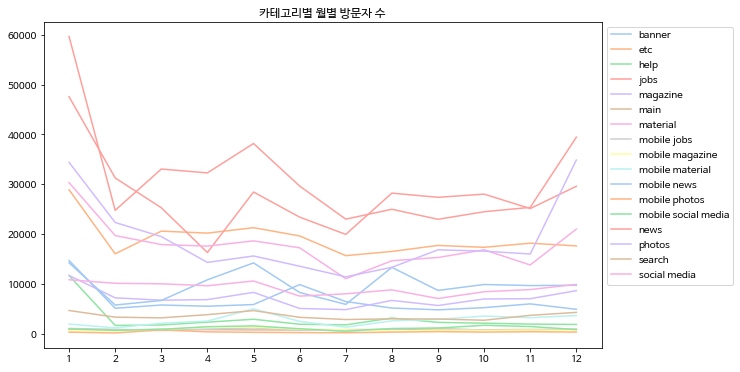

In [37]:
categories = month_cat['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = month_cat[month_cat['Category'] == category]
    plt.plot(subset['Timestamp'], subset['New IP'], label=category)

plt.title('카테고리별 월별 방문자 수')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(subset['Timestamp'])
plt.show()

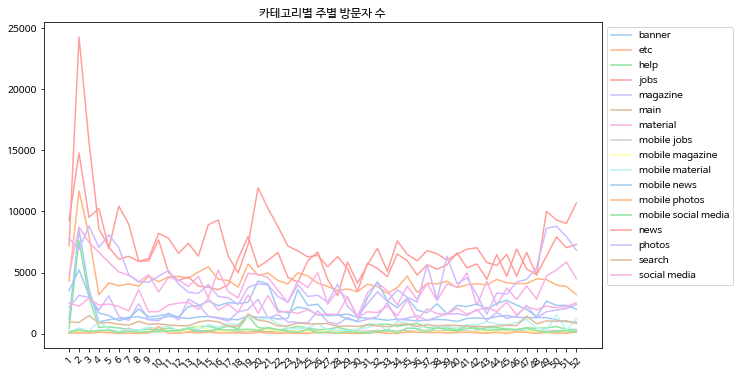

In [38]:
categories = month_cat['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = week_cat[week_cat['Category'] == category]
    plt.plot(subset['week'], subset['New IP'], label=category)

plt.title('카테고리별 주별 방문자 수')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(subset['week'], rotation=45)

plt.show()

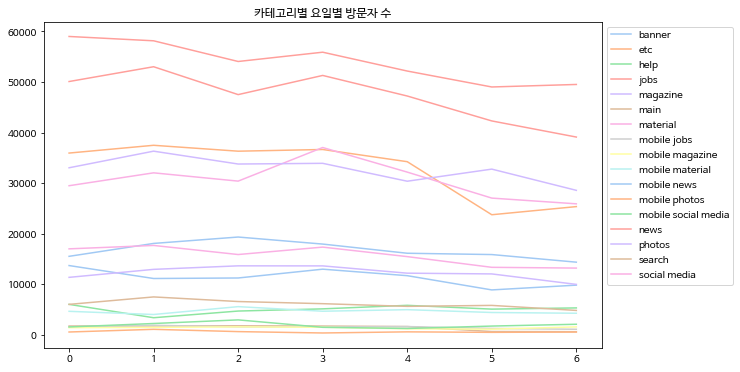

In [39]:
categories = month_cat['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = day_cat[day_cat['Category'] == category]
    plt.plot(subset['Timestamp'], subset['New IP'], label=category)

plt.title('카테고리별 요일별 방문자 수')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

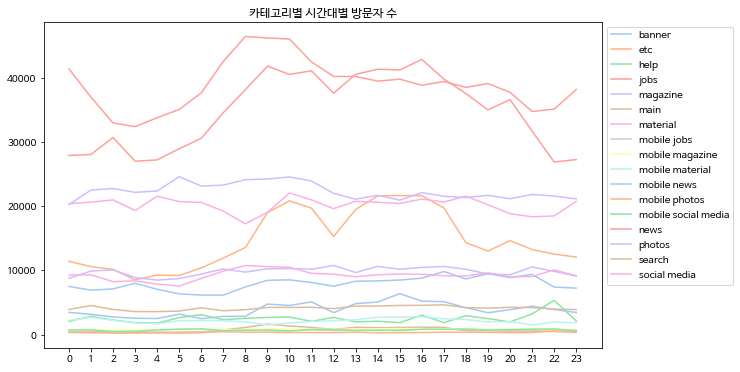

In [40]:
categories = month_cat['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = hour_cat[hour_cat['Category'] == category]
    plt.plot(subset['Timestamp'], subset['New IP'], label=category)

plt.title('카테고리별 시간대별 방문자 수')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(subset['Timestamp'])
plt.show()

## 시간요소별 방문자 평균 체류시간 (Duration)

In [224]:
duration

,Timestamp,New IP,Duration
0,2022-08-10 11:09:03+09:00,26317,0 days 00:00:00
1,2022-08-02 23:14:11+09:00,4553,0 days 00:00:00
2,2022-08-04 05:03:30+09:00,10947,0 days 00:00:00
3,2022-08-04 20:10:47+09:00,9812,0 days 00:09:23
4,2022-08-08 15:32:53+09:00,17282,0 days 06:09:54
...,...,...,...
13738582,2023-07-31 18:44:41+09:00,1042599,0 days 09:41:19
13738583,2023-07-31 18:44:42+09:00,1042599,0 days 09:41:19
13738584,2023-07-31 18:44:43+09:00,1042599,0 days 09:41:19
13738585,2023-07-31 18:44:44+09:00,1042599,0 days 09:41:19


In [225]:
time_dur = duration.copy()

In [226]:
#Duration을 초로 변환 
time_dur['Duration'] = time_dur['Duration'].str.split(' ').apply(lambda x: int(x[0]) * 24 * 3600 + pd.to_timedelta(x[2]).seconds)

In [227]:
time_dur

,Timestamp,New IP,Duration
0,2022-08-10 11:09:03+09:00,26317,0
1,2022-08-02 23:14:11+09:00,4553,0
2,2022-08-04 05:03:30+09:00,10947,0
3,2022-08-04 20:10:47+09:00,9812,563
4,2022-08-08 15:32:53+09:00,17282,22194
...,...,...,...
13738582,2023-07-31 18:44:41+09:00,1042599,34879
13738583,2023-07-31 18:44:42+09:00,1042599,34879
13738584,2023-07-31 18:44:43+09:00,1042599,34879
13738585,2023-07-31 18:44:44+09:00,1042599,34879


In [241]:
inner_dur = inner.copy()
inner_dur['Duration'] = inner_dur.groupby([inner_dur['Timestamp'].dt.strftime('%Y-%m-%d'),'New IP'])['Timestamp'].transform(lambda x: x.max() - x.min())
inner_dur = inner_dur[['Timestamp', 'New IP', "Duration"]].drop_duplicates().reset_index(drop=True)
inner_dur['Duration'] = inner_dur['Duration'].astype('string')
inner_dur['Duration'] = inner_dur['Duration'].str.split(' ').apply(lambda x: int(x[0]) * 24 * 3600 + pd.to_timedelta(x[2]).seconds)
inner_dur

,Timestamp,New IP,Duration
0,2022-08-01 09:01:55+09:00,2087,1754
1,2022-08-01 09:02:56+09:00,2087,1754
2,2022-08-01 09:03:11+09:00,1372,172
3,2022-08-01 09:03:11+09:00,2087,1754
4,2022-08-01 09:03:17+09:00,1372,172
...,...,...,...
1034880,2023-07-31 18:39:02+09:00,1043272,74
1034881,2023-07-31 18:39:03+09:00,1043272,74
1034882,2023-07-31 18:40:04+09:00,1042718,26730
1034883,2023-07-31 18:43:52+09:00,1042065,806


In [242]:
outer_dur = outer.copy()
outer_dur['Duration'] = outer_dur.groupby([outer_dur['Timestamp'].dt.strftime('%Y-%m-%d'),'New IP'])['Timestamp'].transform(lambda x: x.max() - x.min())
outer_dur = outer_dur[['Timestamp', 'New IP', "Duration"]].drop_duplicates().reset_index(drop=True)
outer_dur['Duration'] = outer_dur['Duration'].astype('string')
outer_dur['Duration'] = outer_dur['Duration'].str.split(' ').apply(lambda x: int(x[0]) * 24 * 3600 + pd.to_timedelta(x[2]).seconds)
outer_dur

,Timestamp,New IP,Duration
0,2022-08-01 09:00:27+09:00,2087,0
1,2022-08-01 09:00:53+09:00,1367,0
2,2022-08-01 09:01:01+09:00,926,0
3,2022-08-01 09:01:47+09:00,1773,0
4,2022-08-01 09:02:43+09:00,1665,0
...,...,...,...
248239,2023-07-31 18:25:50+09:00,1043343,4838
248240,2023-07-31 18:30:55+09:00,1042558,65624
248241,2023-07-31 18:34:57+09:00,1042501,0
248242,2023-07-31 18:40:49+09:00,1042558,65624


In [243]:
def time4(df):
    # 월별
    month_dur = df.groupby(df['Timestamp'].dt.month)['Duration'].mean().reset_index()
    month_dur = pd.DataFrame(month_dur)
    #주별
    week_dur = df.groupby(df['Timestamp'].dt.isocalendar().week)['Duration'].mean().reset_index()
    week_dur = pd.DataFrame(week_dur)
    #요일별
    day_dur = df.groupby(df['Timestamp'].dt.weekday)['Duration'].mean().reset_index()
    day_dur = pd.DataFrame(day_dur)
    #시간대별
    hour_dur = df.groupby(df['Timestamp'].dt.hour)['Duration'].mean().reset_index()
    hour_dur = pd.DataFrame(hour_dur)

    return month_dur, week_dur, day_dur, hour_dur

In [244]:
month_dur, week_dur, day_dur, hour_dur = time4(time_dur)
month_dur_in, week_dur_in, day_dur_in, hour_dur_in = time4(inner_dur)
month_dur_out, week_dur_out, day_dur_out, hour_dur_out = time4(outer_dur)

In [246]:
month_dur.to_csv("1_전체_월별_방문자_평균_체류시간.csv", index=False)
month_dur_in.to_csv("1_내부_월별_방문자_평균_체류시간.csv", index=False)
month_dur_out.to_csv("1_외부_월별_방문자_평균_체류시간.csv", index=False)

In [245]:
month_dur

,Timestamp,Duration
0,1,55889.881400
1,2,57575.250618
2,3,62939.898221
3,4,60657.662059
4,5,59791.282532
5,6,56741.806041
6,7,61636.528659
7,8,66336.713062
8,9,70069.176039
9,10,64869.701435


In [69]:
week_dur

,week,Duration
0,1,54655.756617
1,2,54917.009439
2,3,51895.496426
3,4,59048.508762
4,5,61665.714166
5,6,57919.422171
6,7,53884.136557
7,8,59849.116707
8,9,57788.514454
9,10,61713.514701


In [70]:
day_dur

,Timestamp,Duration
0,0,60079.941871
1,1,61264.829431
2,2,60225.817861
3,3,59595.442657
4,4,61158.503459
5,5,68143.960716
6,6,68303.232539


In [71]:
hour_dur

,Timestamp,Duration
0,0,66831.316582
1,1,68321.902560
2,2,68298.187640
3,3,68898.068260
4,4,68876.890856
5,5,68827.657695
6,6,68199.445790
7,7,67015.280780
8,8,63874.959009
9,9,58361.500351


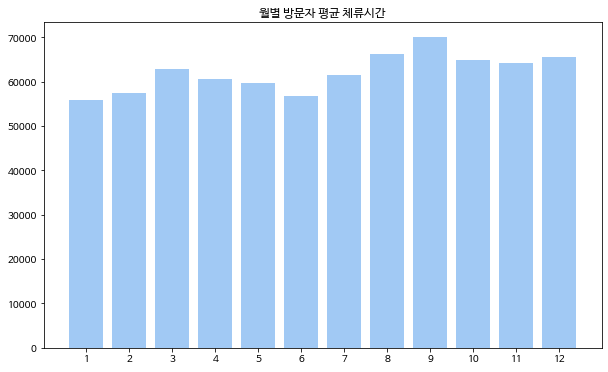

In [73]:
plt.figure(figsize=(10, 6))
plt.bar(month_dur['Timestamp'], month_dur['Duration'])
plt.title('월별 방문자 평균 체류시간')
plt.xticks(month_dur['Timestamp'])
plt.show()

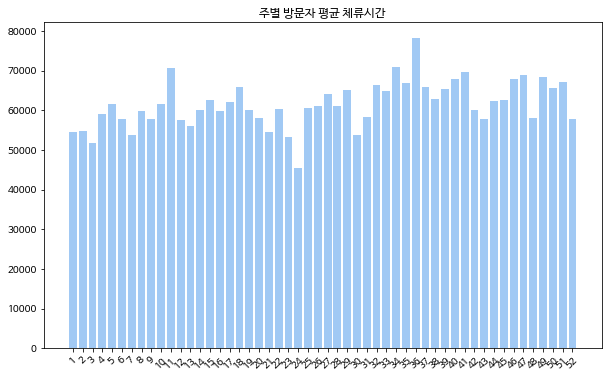

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(week_dur['week'], week_dur['Duration'])
plt.title('주별 방문자 평균 체류시간')
plt.xticks(week_dur['week'], rotation=45)
plt.show()

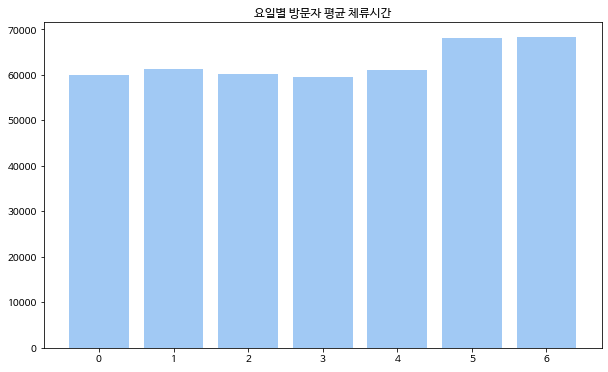

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(day_dur['Timestamp'], day_dur['Duration'])
plt.title('요일별 방문자 평균 체류시간')
plt.show()

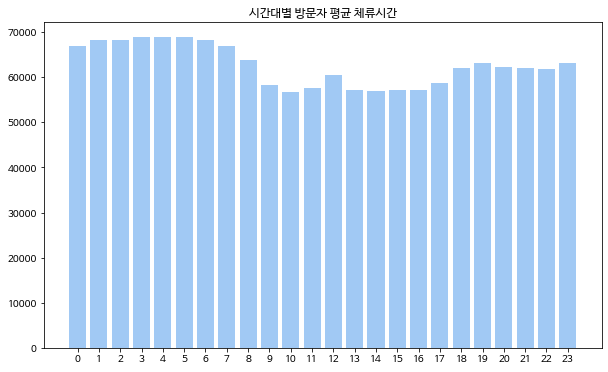

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(hour_dur['Timestamp'], hour_dur['Duration'])
plt.title('시간대별 방문자 평균 체류시간')
plt.xticks(hour_dur['Timestamp'])
plt.show()

- **월별 주별, 월별 요일별, 월별 시간대별 평균 체류시간**

In [248]:
def time5(df):
    # 월별 주별
    week_dur1 = df.groupby([df['Timestamp'].dt.month, df['Timestamp'].dt.isocalendar().week])['Duration'].mean().reset_index()
    week_dur1 = pd.DataFrame(week_dur1)

    #월별 요일별
    month = df.copy()
    month["month"] = month['Timestamp'].dt.month
    day_dur1 = month.groupby(['month', month['Timestamp'].dt.weekday])['Duration'].mean().reset_index()
    day_dur1 = pd.DataFrame(day_dur1)
    
    #월별 시간대별
    month = df.copy()
    month["month"] = month['Timestamp'].dt.month
    hour_dur1 = month.groupby(['month', data['Timestamp'].dt.hour])['Duration'].mean().reset_index()
    hour_dur1 = pd.DataFrame(hour_dur1)

    return week_dur1, day_dur1, hour_dur1

In [249]:
week_dur1, day_dur1, hour_dur1 = time5(time_dur)
week_dur1_in, day_dur1_in, hour_dur1_in = time5(inner_dur)
week_dur1_out, day_dur1_out, hour_dur1_out = time5(outer_dur)

In [250]:
week_dur1.to_csv("1_전체_주별_방문자_평균_체류시간.csv", index=False)
week_dur1_in.to_csv("1_내부_주별_방문자_평균_체류시간.csv", index=False)
week_dur1_out.to_csv("1_외부_주별_방문자_평균_체류시간.csv", index=False)

day_dur1.to_csv("1_전체_요일별_방문자_평균_체류시간.csv", index=False)
day_dur1_in.to_csv("1_내부_요일별_방문자_평균_체류시간.csv", index=False)
day_dur1_out.to_csv("1_외부_요일별_방문자_평균_체류시간.csv", index=False)

hour_dur1.to_csv("1_전체_시간대별_방문자_평균_체류시간.csv", index=False)
hour_dur1_in.to_csv("1_내부_시간대별_방문자_평균_체류시간.csv", index=False)
hour_dur1_out.to_csv("1_외부_시간대별_방문자_평균_체류시간.csv", index=False)

In [251]:
week_dur1

,Timestamp,week,Duration
0,1,1,54655.756617
1,1,2,54917.009439
2,1,3,51895.496426
3,1,4,59048.508762
4,1,5,63608.621086
...,...,...,...
58,12,48,66154.107832
59,12,49,68519.711416
60,12,50,65552.576153
61,12,51,67266.231902


In [86]:
day_dur1

,month,Timestamp,Duration
0,1,0,58877.264821
1,1,1,51402.197020
2,1,2,50795.453593
3,1,3,55231.398539
4,1,4,53062.612773
...,...,...,...
79,12,2,63153.933454
80,12,3,63337.104305
81,12,4,63003.270773
82,12,5,61812.899242


In [87]:
hour_dur1

,month,Timestamp,Duration
0,1,0,55982.904870
1,1,1,57081.517041
2,1,2,55201.137149
3,1,3,56001.872552
4,1,4,57189.999405
...,...,...,...
283,12,19,65738.406730
284,12,20,65556.424411
285,12,21,66291.266027
286,12,22,65152.773551


# 페이지뷰 분석 

## 시간요소별 페이지뷰 분석 

*URL 수, New IP 수 비교하기 => 두 값이 같은지 확인*

In [89]:
test = data.groupby(data['Timestamp'].dt.month)['URL'].count().reset_index()
test = pd.DataFrame(test)
test

,Timestamp,URL
0,1,1249249
1,2,933744
2,3,1232767
3,4,1495913
4,5,1195148
5,6,1276571
6,7,938904
7,8,1299012
8,9,1440836
9,10,1022805


In [90]:
test1 = data.groupby(data['Timestamp'].dt.month)['New IP'].count().reset_index()
test1 = pd.DataFrame(test1)
test1

,Timestamp,New IP
0,1,1249249
1,2,933744
2,3,1232767
3,4,1495913
4,5,1195148
5,6,1276571
6,7,938904
7,8,1299012
8,9,1440836
9,10,1022805


In [93]:
test['URL'] == test1['New IP']   #URL & New IP 같음을 확인

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
dtype: bool

In [1215]:
outer_df['Timestamp1'] = outer_df['Timestamp']
outer_df.set_index('Timestamp1', inplace=True)

In [1219]:
outer_df.head(2)

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type,month,hour
Timestamp1,,,,,,,,,,,,,,,,,,,
2022-08-01 09:00:27+09:00,2022-08-01 09:00:27+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/view.html?sn=11901&...,etc,NA,https://www.google.com/,NA,google,etc,etc,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부,8,9
2022-08-01 09:01:55+09:00,2022-08-01 09:01:55+09:00,59.18.67.214,lafent.com/smt_hgreen/prod/dsgreq_popup.html?p...,etc,NA,http://www.lafent.com/smt_hgreen/prod/view.htm...,NA,lafent,etc,html,Mozilla/5.0 (Windows NT 10.0; Win64; x64; ; NC...,windows,2087,etc,외부,외부,외부,8,9


In [1224]:
inner_df.set_index('Timestamp1', inplace=True)
inner_df.head(2)

,Timestamp,IP,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,New IP,New Category,User Type_x,User Type_y,User Type,month,hour
Timestamp1,,,,,,,,,,,,,,,,,,,
2022-08-01 14:30:55+09:00,2022-08-01 14:30:55+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=24596,jobs,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부,8,14
2022-08-01 14:32:14+09:00,2022-08-01 14:32:14+09:00,1.220.249.83,lafent.com/jobse/job_view.html?mcd=C01&idx=23934,jobs,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (Linux; Android 12; SM-A908N Build...,android,10,jobs,내부,내부,내부,8,14


In [1225]:
def pv(df):
    month_pv = df['New IP'].resample('1M').count().reset_index()  #월별 
    week_pv = df['New IP'].resample('1W').count().reset_index()  #주별 
    return month_pv, week_pv

In [1226]:
month_pv, week_pv = pv(noncrawler)
month_pv_in, week_pv_in = pv(inner_df)
month_pv_out, week_pv_out = pv(outer_df)

In [1234]:
month_pv.to_csv("1_전체_월별_페이지뷰.csv", index=False)
month_pv_in.to_csv("1_내부_월별_페이지뷰.csv", index=False)
month_pv_out.to_csv("1_외부_월별_페이지뷰.csv", index=False)

week_pv.to_csv("1_전체_주별_페이지뷰.csv", index=False)
week_pv_in.to_csv("1_내부_주별_페이지뷰.csv", index=False)
week_pv_out.to_csv("1_외부_주별_페이지뷰.csv", index=False)

In [1235]:
inner_df['day'] = inner_df['Timestamp'].dt.weekday
outer_df['day'] = outer_df['Timestamp'].dt.weekday

In [1242]:
noncrawler['month'] = noncrawler['Timestamp'].dt.month
noncrawler['day'] = noncrawler['Timestamp'].dt.weekday
noncrawler['hour'] = noncrawler['Timestamp'].dt.hour

In [1244]:
day_pv = noncrawler.groupby(['month', 'day'])['New IP'].count().reset_index().pivot_table(index = ['month'], columns = ['day'], values = ['New IP']).fillna(0)
day_pv_in = inner_df.groupby(['month', 'day'])['New IP'].count().reset_index().pivot_table(index = ['month'], columns = ['day'], values = ['New IP']).fillna(0)
day_pv_out = outer_df.groupby(['month', 'day'])['New IP'].count().reset_index().pivot_table(index = ['month'], columns = ['day'], values = ['New IP']).fillna(0)

hour_pv = noncrawler.groupby(['month', 'hour'])['New IP'].count().reset_index().pivot_table(index = ['month'], columns = ['hour'], values = ['New IP']).fillna(0)
hour_pv_in = inner_df.groupby(['month', 'hour'])['New IP'].count().reset_index().pivot_table(index = ['month'], columns = ['hour'], values = ['New IP']).fillna(0)
hour_pv_out = outer_df.groupby(['month', 'hour'])['New IP'].count().reset_index().pivot_table(index = ['month'], columns = ['hour'], values = ['New IP']).fillna(0)

In [1251]:
day_pv.to_csv("1_전체_요일별_페이지뷰.csv", index=False)
day_pv_in.to_csv("1_내부_요일별_페이지뷰.csv", index=False)
day_pv_out.to_csv("1_외부_요일별_페이지뷰.csv", index=False)

hour_pv.to_csv("1_전체_시간대별_페이지뷰.csv", index=False)
hour_pv_in.to_csv("1_내부_시간대별_페이지뷰.csv", index=False)
hour_pv_out.to_csv("1_외부_시간대별_페이지뷰.csv", index=False)

In [252]:
def time6(df):
    # 월별
    month_pv = df.groupby(df['Timestamp'].dt.month)['New IP'].count().reset_index()
    month_pv = pd.DataFrame(month_pv)
    #주별
    week_pv = df.groupby(df['Timestamp'].dt.isocalendar().week)['New IP'].count().reset_index()
    week_pv = pd.DataFrame(week_pv)
    #요일별
    day_pv = df.groupby(df['Timestamp'].dt.weekday)['New IP'].count().reset_index()
    day_pv = pd.DataFrame(day_pv)
    #시간대별 
    hour_pv = df.groupby(df['Timestamp'].dt.hour)['New IP'].count().reset_index()
    hour_pv = pd.DataFrame(hour_pv)

    return month_pv, week_pv, day_pv, hour_pv 

In [253]:
month_pv, week_pv, day_pv, hour_pv = time6(data)
month_pv_in, week_pv_in, day_pv_in, hour_pv_in = time6(inner)
month_pv_out, week_pv_out, day_pv_out, hour_pv_out = time6(outer)

In [254]:
month_pv.to_csv("1_전체_월별_페이지뷰.csv", index=False)
month_pv_in.to_csv("1_내부_월별_페이지뷰.csv", index=False)
month_pv_out.to_csv("1_외부_월별_페이지뷰.csv", index=False)

In [103]:
month_pv

,Timestamp,New IP
0,1,1249249
1,2,933744
2,3,1232767
3,4,1495913
4,5,1195148
5,6,1276571
6,7,938904
7,8,1299012
8,9,1440836
9,10,1022805


In [104]:
week_pv

,week,New IP
0,1,243485
1,2,319872
2,3,297676
3,4,267201
4,5,248878
5,6,285592
6,7,225081
7,8,223264
8,9,172487
9,10,253225


In [105]:
day_pv

,Timestamp,New IP
0,0,2169372
1,1,2324876
2,2,2389566
3,3,2045946
4,4,1997628
5,5,1760639
6,6,1626577


In [106]:
hour_pv

,Timestamp,New IP
0,0,557651
1,1,586910
2,2,510768
3,3,516075
4,4,510978
5,5,526763
6,6,529491
7,7,548814
8,8,576321
9,9,635247


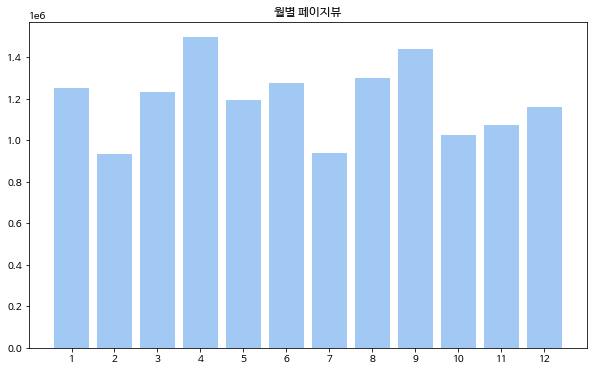

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(month_pv['Timestamp'], month_pv['New IP'])
plt.title('월별 페이지뷰')
plt.xticks(month_pv['Timestamp'])
plt.show()

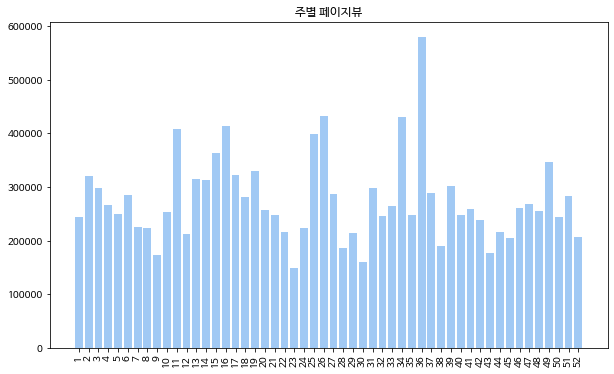

In [113]:
plt.figure(figsize=(10, 6))
plt.bar(week_pv['week'], week_pv['New IP'])
plt.title('주별 페이지뷰')
plt.xticks(week_pv['week'], rotation=90)
plt.show()

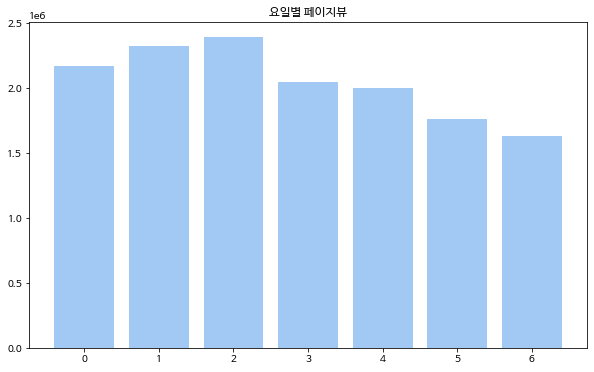

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(day_pv['Timestamp'], day_pv['New IP'])
plt.title('요일별 페이지뷰')
plt.show()

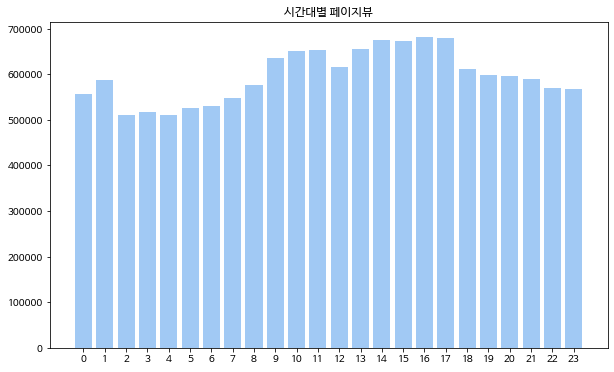

In [115]:
plt.figure(figsize=(10, 6))
plt.bar(hour_pv['Timestamp'], hour_pv['New IP'])
plt.title('시간대별 페이지뷰')
plt.xticks(hour_pv['Timestamp'])
plt.show()

- **월별 주별, 월별 요일별, 월별 시간대별 페이지뷰**

In [255]:
def time7(df):
    # 월별 주별
    week_pv1 = df.groupby([df['Timestamp'].dt.month, df['Timestamp'].dt.isocalendar().week])['New IP'].count().reset_index()
    week_pv1 = pd.DataFrame(week_pv1)
    
    #월별 요일별
    month = df.copy()
    month["month"] = month['Timestamp'].dt.month
    day_pv1 = month.groupby(['month', month['Timestamp'].dt.weekday])['New IP'].count().reset_index()
    day_pv1 = pd.DataFrame(day_pv1)
    
    #월별 시간대별
    month = df.copy()
    month["month"] = month['Timestamp'].dt.month
    hour_pv1 = month.groupby(['month', month['Timestamp'].dt.hour])['New IP'].count().reset_index()
    hour_pv1 = pd.DataFrame(hour_pv1)

    return week_pv1, day_pv1, hour_pv1

In [256]:
week_pv1, day_pv1, hour_pv1 = time7(data)
week_pv1_in, day_pv1_in, hour_pv1_in = time7(inner)
week_pv1_out, day_pv1_out, hour_pv1_out = time7(outer)

In [257]:
week_pv1.to_csv("1_전체_주별_페이지뷰.csv", index=False)
week_pv1_in.to_csv("1_내부_주별_페이지뷰.csv", index=False)
week_pv1_out.to_csv("1_외부_주별_페이지뷰.csv", index=False)

day_pv1.to_csv("1_전체_요일별_페이지뷰.csv", index=False)
day_pv1_in.to_csv("1_내부_요일별_페이지뷰.csv", index=False)
day_pv1_out.to_csv("1_외부_요일별_페이지뷰.csv", index=False)

hour_pv1.to_csv("1_전체_시간대별_페이지뷰.csv", index=False)
hour_pv1_in.to_csv("1_내부_시간대별_페이지뷰.csv", index=False)
hour_pv1_out.to_csv("1_외부_시간대별_페이지뷰.csv", index=False)

In [133]:
week_pv1

,Timestamp,week,New IP
0,1,1,243485
1,1,2,319872
2,1,3,297676
3,1,4,267201
4,1,5,91734
...,...,...,...
58,12,48,108318
59,12,49,346678
60,12,50,244516
61,12,51,282478


In [134]:
day_pv1

,month,Timestamp,New IP
0,1,0,185959
1,1,1,205769
2,1,2,212523
3,1,3,164029
4,1,4,179789
...,...,...,...
79,12,2,146098
80,12,3,168801
81,12,4,175417
82,12,5,152603


In [135]:
hour_pv1

,month,Timestamp,New IP
0,1,0,51248
1,1,1,50185
2,1,2,43868
3,1,3,43779
4,1,4,45575
...,...,...,...
283,12,19,44440
284,12,20,46448
285,12,21,45415
286,12,22,45797


## 카테고리별 시간요소별 페이지뷰 분석

**카테고리별 평균 페이지뷰**

In [258]:
category_pv = data.groupby('Category')['New IP'].count().reset_index()
category_pv= pd.DataFrame(category_pv)
category_pv

,Category,New IP
0,banner,161694
1,etc,1569370
2,help,311391
3,jobs,1815940
4,magazine,911993
5,main,27119
6,material,1044692
7,mobile jobs,47101
8,mobile magazine,27614
9,mobile material,84489


In [267]:
category_pv_in = inner.groupby('Category')['New IP'].count().reset_index()
category_pv_in= pd.DataFrame(category_pv_in)
category_pv_in

,Category,New IP
0,banner,104747
1,etc,684847
2,help,14341
3,jobs,93877
4,magazine,12729
5,main,3323
6,material,23560
7,mobile jobs,35539
8,mobile magazine,2562
9,mobile material,23574


In [268]:
category_pv_out = outer.groupby('Category')['New IP'].count().reset_index()
category_pv_out= pd.DataFrame(category_pv_out)
category_pv_out

,Category,New IP
0,banner,67
1,etc,141528
2,help,146
3,jobs,11865
4,magazine,5230
5,main,712
6,material,8927
7,mobile jobs,311
8,mobile magazine,3302
9,mobile material,1730


In [269]:
category_pv.to_csv("1_카테고리별_전체_평균_페이지뷰.csv", index=False)
category_pv_in.to_csv("1_카테고리별_내부_평균_페이지뷰.csv", index=False)
category_pv_out.to_csv("1_카테고리별_외부_평균_페이지뷰.csv", index=False)

**카테고리별 시간요소별 페이지뷰**

In [263]:
def time8(df):
    # 월별
    month_cat_pv = df.groupby(['Category', df['Timestamp'].dt.month])['New IP'].count().reset_index()
    month_cat_pv = pd.DataFrame(month_cat_pv)
    #주별
    week_cat_pv = df.groupby(['Category', df['Timestamp'].dt.isocalendar().week])['New IP'].count().reset_index()
    week_cat_pv = pd.DataFrame(week_cat_pv)
    #요일별
    day_cat_pv = df.groupby(['Category', df['Timestamp'].dt.weekday])['New IP'].count().reset_index()
    day_cat_pv = pd.DataFrame(day_cat_pv)
    #시간대별
    hour_cat_pv = df.groupby(['Category', df['Timestamp'].dt.hour])['New IP'].count().reset_index()
    hour_cat_pv = pd.DataFrame(hour_cat_pv)

    return month_cat_pv, week_cat_pv, day_cat_pv, hour_cat_pv

In [264]:
month_cat_pv, week_cat_pv, day_cat_pv, hour_cat_pv = time8(data)
month_cat_pv_in, week_cat_pv_in, day_cat_pv_in, hour_cat_pv_in = time8(inner)
month_cat_pv_out, week_cat_pv_out, day_cat_pv_out, hour_cat_pv_out = time8(outer)

In [266]:
month_cat_pv.to_csv("1_카테고리별_전체_월별_페이지뷰.csv", index=False)
month_cat_pv_in.to_csv("1_카테고리별_내부_월별_페이지뷰.csv", index=False)
month_cat_pv_out.to_csv("1_카테고리별_외부_월별_페이지뷰.csv", index=False)

week_cat_pv.to_csv("1_카테고리별_전체_주별_페이지뷰.csv", index=False)
week_cat_pv_in.to_csv("1_카테고리별_내부_주별_페이지뷰.csv", index=False)
week_cat_pv_out.to_csv("1_카테고리별_외부_주별_페이지뷰.csv", index=False)

day_cat_pv.to_csv("1_카테고리별_전체_요일별_페이지뷰.csv", index=False)
day_cat_pv_in.to_csv("1_카테고리별_내부_요일별_페이지뷰.csv", index=False)
day_cat_pv_out.to_csv("1_카테고리별_외부_요일별_페이지뷰.csv", index=False)

hour_cat_pv.to_csv("1_카테고리별_전체_시간대별_페이지뷰.csv", index=False)
hour_cat_pv_in.to_csv("1_카테고리별_내부_시간대별_페이지뷰.csv", index=False)
hour_cat_pv_out.to_csv("1_카테고리별_외부_시간대별_페이지뷰.csv", index=False)

In [265]:
month_cat_pv

,Category,Timestamp,New IP
0,banner,1,24384
1,banner,2,11129
2,banner,3,12799
3,banner,4,13244
4,banner,5,13105
...,...,...,...
199,social media,8,34956
200,social media,9,30617
201,social media,10,41853
202,social media,11,40845


In [120]:
week_cat_pv

,Category,week,New IP
0,banner,1,2672
1,banner,2,12396
2,banner,3,6101
3,banner,4,2173
4,banner,5,2532
...,...,...,...
879,social media,48,12273
880,social media,49,12557
881,social media,50,10018
882,social media,51,12987


In [121]:
day_cat_pv

,Category,Timestamp,New IP
0,banner,0,27732
1,banner,1,24258
2,banner,2,23736
3,banner,3,25859
4,banner,4,23917
...,...,...,...
114,social media,2,74204
115,social media,3,68384
116,social media,4,62465
117,social media,5,52310


In [122]:
hour_cat_pv

,Category,Timestamp,New IP
0,banner,0,5618
1,banner,1,4914
2,banner,2,4162
3,banner,3,3811
4,banner,4,3725
...,...,...,...
403,social media,19,20554
404,social media,20,19387
405,social media,21,17993
406,social media,22,18613


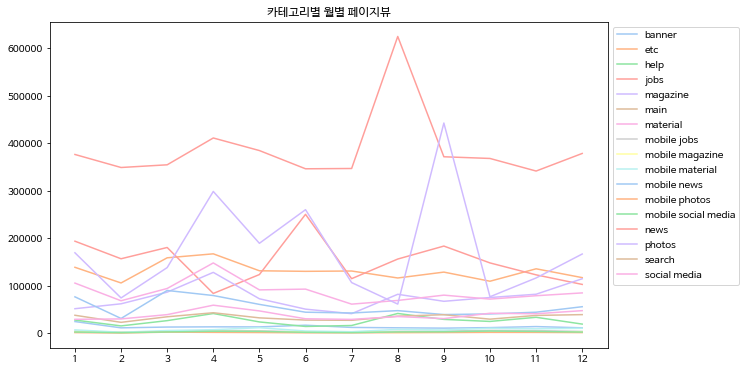

In [123]:
categories = month_cat_pv['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = month_cat_pv[month_cat_pv['Category'] == category]
    plt.plot(subset['Timestamp'], subset['New IP'], label=category)

plt.title('카테고리별 월별 페이지뷰')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(subset['Timestamp'])
plt.show()

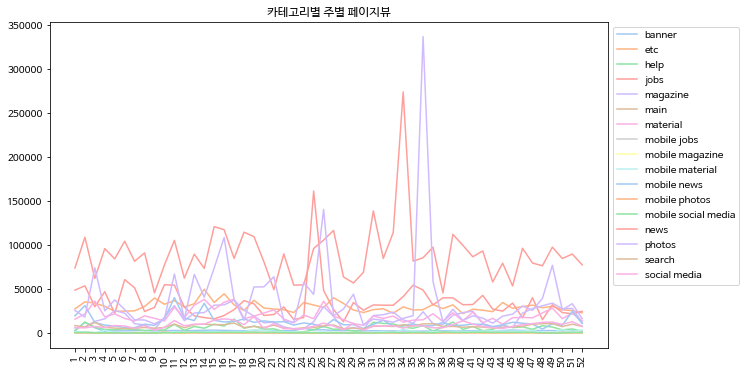

In [126]:
categories = week_cat_pv['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = week_cat_pv[week_cat_pv['Category'] == category]
    plt.plot(subset['week'], subset['New IP'], label=category)

plt.title('카테고리별 주별 페이지뷰')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(subset['week'], rotation=90)
plt.show()

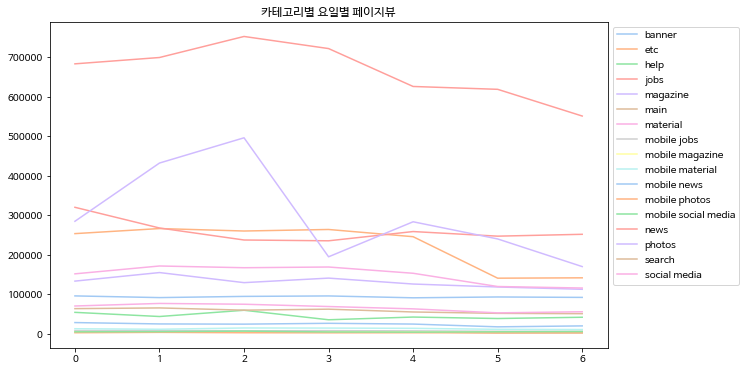

In [127]:
categories = day_cat_pv['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = day_cat_pv[day_cat_pv['Category'] == category]
    plt.plot(subset['Timestamp'], subset['New IP'], label=category)

plt.title('카테고리별 요일별 페이지뷰')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(subset['Timestamp'])
plt.show()

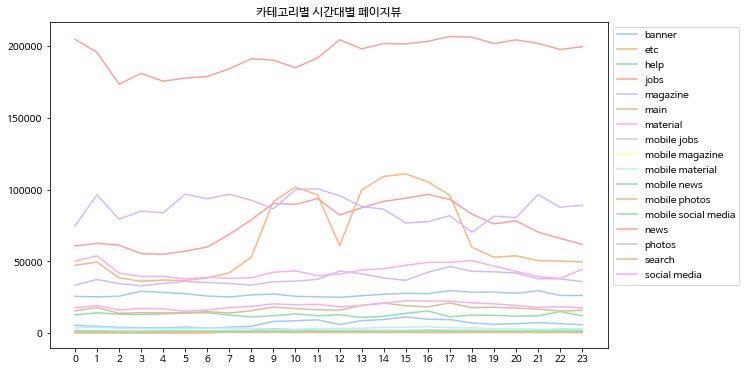

In [128]:
categories = hour_cat_pv['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    subset = hour_cat_pv[hour_cat_pv['Category'] == category]
    plt.plot(subset['Timestamp'], subset['New IP'], label=category)

plt.title('카테고리별 시간대별 페이지뷰')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(subset['Timestamp'])
plt.show()

# 방문자 세부 분석 (New IP 기준)

In [138]:
def time9(df):
    #일자별 방문자별 평균 사이트 내 이동 수 (unique URL)
    user1 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'New IP'])['URL'].nunique().reset_index()
    user1 = pd.DataFrame(user1)
    #일자별 방문자별 카테고리별 개수
    user2 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'New IP'])['Category'].count().reset_index()
    user2 = pd.DataFrame(user2)
    #일자별 방문자별 카테고리별 페이지뷰 (not unique URL)
    user3 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'New IP', 'Category'])['URL'].count().reset_index()
    user3 = pd.DataFrame(user3)
    
    return user1, user2, user3

In [142]:
user1, user2, user3 = time9(data)

In [143]:
user1

,Timestamp,New IP,URL
0,2022-08-01,1,2
1,2022-08-01,10,5
2,2022-08-01,100,2
3,2022-08-01,1000,1
4,2022-08-01,1001,1
...,...,...,...
1043692,2023-07-31,1043693,1
1043693,2023-07-31,1043694,1
1043694,2023-07-31,1043695,1
1043695,2023-07-31,1043696,11


In [144]:
user2

,Timestamp,New IP,Category
0,2022-08-01,1,2
1,2022-08-01,10,6
2,2022-08-01,100,2
3,2022-08-01,1000,1
4,2022-08-01,1001,1
...,...,...,...
1043692,2023-07-31,1043693,1
1043693,2023-07-31,1043694,1
1043694,2023-07-31,1043695,1
1043695,2023-07-31,1043696,11


In [145]:
user3

,Timestamp,New IP,Category,URL
0,2022-08-01,1,etc,2
1,2022-08-01,10,jobs,6
2,2022-08-01,100,banner,2
3,2022-08-01,1000,material,1
4,2022-08-01,1001,social media,1
...,...,...,...,...
1933532,2023-07-31,1043695,news,1
1933533,2023-07-31,1043696,help,1
1933534,2023-07-31,1043696,news,7
1933535,2023-07-31,1043696,photos,3


# 사이트 세부 분석 (URL 기준)

In [146]:
def time10(df):
    #일자별 사이트별 방문자 수 (unique New IP)
    url1 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'URL'])['New IP'].nunique().reset_index()
    url1 = pd.DataFrame(url1)
    #일자별 사이트별 페이지뷰 수 (not unique New IP)
    url2 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'URL'])['New IP'].count().reset_index()
    url2 = pd.DataFrame(url2)
    #일자별 사이트별 카테고리 개수
    url3 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'URL'])['Category'].count().reset_index()
    url3 = pd.DataFrame(url3)
    #일자별 사이트별 카테고리별 방문자 수 (unique New IP)
    url4 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'URL', 'Category'])['New IP'].nunique().reset_index()
    url4 = pd.DataFrame(url4)
    #일자별 사이트별 카티고리별 페이지뷰 수 (not unique New IP)
    url5 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'URL', 'Category'])['New IP'].count().reset_index()
    url5 = pd.DataFrame(url5)
    
    return url1, url2, url3, url4, url5

In [147]:
url1, url2, url3, url4, url5 = time10(data)

In [148]:
url1

,Timestamp,URL,New IP
0,2022-08-01,444it.com/space-uid-1386799.html,1
1,2022-08-01,allbut.co.kr/member/login.html%3FnoMemberOrder...,1
2,2022-08-01,allbut.co.kr/member/login.html?noMemberOrder=&...,1
3,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,2
4,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,1
...,...,...,...
11221127,2023-07-31,lafent.com/sns/qna_view.html?mcd=B01&idx=5248,1
11221128,2023-07-31,mixo.io%2Fsite%2Fnight-life-in-gang-nam-94g5u%...,6
11221129,2023-07-31,staging.progressmediagroup.com/combina%C8%9Bii...,1
11221130,2023-07-31,xaydungthanhnien.com/2016/04/gia-xay-nha-tro-t...,1


In [149]:
url2

,Timestamp,URL,New IP
0,2022-08-01,444it.com/space-uid-1386799.html,2
1,2022-08-01,allbut.co.kr/member/login.html%3FnoMemberOrder...,1
2,2022-08-01,allbut.co.kr/member/login.html?noMemberOrder=&...,1
3,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,2
4,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,1
...,...,...,...
11221127,2023-07-31,lafent.com/sns/qna_view.html?mcd=B01&idx=5248,1
11221128,2023-07-31,mixo.io%2Fsite%2Fnight-life-in-gang-nam-94g5u%...,7
11221129,2023-07-31,staging.progressmediagroup.com/combina%C8%9Bii...,2
11221130,2023-07-31,xaydungthanhnien.com/2016/04/gia-xay-nha-tro-t...,1


In [150]:
url3

,Timestamp,URL,Category
0,2022-08-01,444it.com/space-uid-1386799.html,2
1,2022-08-01,allbut.co.kr/member/login.html%3FnoMemberOrder...,1
2,2022-08-01,allbut.co.kr/member/login.html?noMemberOrder=&...,1
3,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,2
4,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,1
...,...,...,...
11221127,2023-07-31,lafent.com/sns/qna_view.html?mcd=B01&idx=5248,1
11221128,2023-07-31,mixo.io%2Fsite%2Fnight-life-in-gang-nam-94g5u%...,7
11221129,2023-07-31,staging.progressmediagroup.com/combina%C8%9Bii...,2
11221130,2023-07-31,xaydungthanhnien.com/2016/04/gia-xay-nha-tro-t...,1


In [151]:
url4

,Timestamp,URL,Category,New IP
0,2022-08-01,444it.com/space-uid-1386799.html,banner,1
1,2022-08-01,allbut.co.kr/member/login.html%3FnoMemberOrder...,banner,1
2,2022-08-01,allbut.co.kr/member/login.html?noMemberOrder=&...,banner,1
3,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,banner,2
4,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,banner,1
...,...,...,...,...
11226640,2023-07-31,lafent.com/sns/qna_view.html?mcd=B01&idx=5248,social media,1
11226641,2023-07-31,mixo.io%2Fsite%2Fnight-life-in-gang-nam-94g5u%...,banner,6
11226642,2023-07-31,staging.progressmediagroup.com/combina%C8%9Bii...,banner,1
11226643,2023-07-31,xaydungthanhnien.com/2016/04/gia-xay-nha-tro-t...,banner,1


In [152]:
url5

,Timestamp,URL,Category,New IP
0,2022-08-01,444it.com/space-uid-1386799.html,banner,2
1,2022-08-01,allbut.co.kr/member/login.html%3FnoMemberOrder...,banner,1
2,2022-08-01,allbut.co.kr/member/login.html?noMemberOrder=&...,banner,1
3,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,banner,2
4,2022-08-01,bymyseo.com/2022/02/list-of-working-proxy-judg...,banner,1
...,...,...,...,...
11226640,2023-07-31,lafent.com/sns/qna_view.html?mcd=B01&idx=5248,social media,1
11226641,2023-07-31,mixo.io%2Fsite%2Fnight-life-in-gang-nam-94g5u%...,banner,7
11226642,2023-07-31,staging.progressmediagroup.com/combina%C8%9Bii...,banner,2
11226643,2023-07-31,xaydungthanhnien.com/2016/04/gia-xay-nha-tro-t...,banner,1


# 카테고리 세부 분석 (Category 기준)

In [153]:
def time11(df):
    #일자별 카테고리별 방문자 수 (unique New IP)
    cat1 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'Category'])['New IP'].nunique().reset_index()
    cat1 = pd.DataFrame(cat1)
    #일자별 카테고리별 페이지뷰 수 (not unique New IP)
    cat2 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'Category'])['New IP'].count().reset_index()
    cat2 = pd.DataFrame(cat2)
    #일자별 카테고리별 고유한 사이트 수 (unique URL)
    cat3 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'Category'])['URL'].nunique().reset_index()
    cat3 = pd.DataFrame(cat3)
    #일자별 카테고리별 총 사이트 수 (not unique URL)
    cat4 = df.groupby([df['Timestamp'].dt.strftime('%Y-%m-%d'), 'Category'])['URL'].count().reset_index()
    cat4 = pd.DataFrame(cat4)
    
    return cat1, cat2, cat3, cat4 

In [154]:
cat1, cat2, cat3, cat4 = time11(data)

In [155]:
cat1

,Timestamp,Category,New IP
0,2022-08-01,banner,136
1,2022-08-01,etc,460
2,2022-08-01,help,61
3,2022-08-01,jobs,983
4,2022-08-01,magazine,95
...,...,...,...
6199,2023-07-31,mobile social media,6
6200,2023-07-31,news,358
6201,2023-07-31,photos,206
6202,2023-07-31,search,55


In [156]:
cat2

,Timestamp,Category,New IP
0,2022-08-01,banner,306
1,2022-08-01,etc,3020
2,2022-08-01,help,761
3,2022-08-01,jobs,11570
4,2022-08-01,magazine,2046
...,...,...,...
6199,2023-07-31,mobile social media,8
6200,2023-07-31,news,14918
6201,2023-07-31,photos,2582
6202,2023-07-31,search,779


In [157]:
cat3

,Timestamp,Category,URL
0,2022-08-01,banner,126
1,2022-08-01,etc,1450
2,2022-08-01,help,712
3,2022-08-01,jobs,10579
4,2022-08-01,magazine,1771
...,...,...,...
6199,2023-07-31,mobile social media,7
6200,2023-07-31,news,12680
6201,2023-07-31,photos,2375
6202,2023-07-31,search,617


In [158]:
cat4

,Timestamp,Category,URL
0,2022-08-01,banner,306
1,2022-08-01,etc,3020
2,2022-08-01,help,761
3,2022-08-01,jobs,11570
4,2022-08-01,magazine,2046
...,...,...,...
6199,2023-07-31,mobile social media,8
6200,2023-07-31,news,14918
6201,2023-07-31,photos,2582
6202,2023-07-31,search,779


## Crawler

**사이트별 비중**

In [270]:
crawler

,IP,Timestamp,URL,Category,URL Search Word,Referer,Referer Search Word,Referer Source,Referer Category,Referer Content Type,User Agent,Device,User Type,New IP,New Category
1,212.64.214.249,2022-08-02 23:14:11+09:00,lafent.com/wp-json/wp/v2/posts?slug=The%20-Def...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,미확인,4553,etc
2,95.216.69.148,2022-08-04 05:03:30+09:00,homeloans21.xyz/2021/10/The%20-Definitive%20-G...,banner,NA,NA,NA,NA,etc,etc,NA,crawler; other,미확인,10947,banner
3,204.101.161.19,2022-08-04 20:10:47+09:00,lafent.com/smt_hankukla/index.html,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,미확인,9812,etc
4,1.215.17.66,2022-08-08 15:32:53+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,미확인,17282,etc
5,1.215.17.66,2022-08-08 15:32:53+09:00,lafent.com/smt_designl/project/view.html?sn=10...,etc,NA,NA,NA,NA,etc,etc,NA,crawler; other,미확인,17282,etc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314455,38.242.217.78,2023-07-31 18:42:17+09:00,lafent.com/sns/lamrg_view.html?mcd=C01&bsp=C01...,social media,NA,NA,NA,NA,etc,etc,WordPress/6.2.2; https://aodaithanhmai.com.vn/you,crawler; other,미확인,1043394,social media
14314512,66.249.79.197,2023-07-31 18:43:13+09:00,lafent.com/mbweb/news/view.html?news_id=123727,mobile news,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,crawler; google,미확인,1043595,news
14314554,185.191.171.18,2023-07-31 18:43:57+09:00,lafent.com/sns/photo_list.html?ctf=14&cts=01,social media,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; SemrushBot/7~bl; +htt...,crawler; other,미확인,1042847,social media
14314566,66.249.79.196,2023-07-31 18:44:07+09:00,lafent.com/inews/news_list.html?mcd=C03&cb=03,news,NA,NA,NA,NA,etc,etc,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,crawler; google,미확인,1043594,news


In [273]:
site = crawler.groupby('Device')['New IP'].count().reset_index()
site= pd.DataFrame(site)
site

,Device,New IP
0,crawler; daum,1606606
1,crawler; facebook,165012
2,crawler; google,3019207
3,crawler; naver,1823845
4,crawler; other,4442902


In [275]:
site1 = crawler.groupby('Device')['New IP'].nunique().reset_index()
site1= pd.DataFrame(site1)
site1

,Device,New IP
0,crawler; daum,673
1,crawler; facebook,42055
2,crawler; google,8678
3,crawler; naver,211594
4,crawler; other,353396


===========================================================

## 날짜별 URL별 분석

#### 일별 URL별 총 IP 수 (페이지뷰)

In [129]:
base['pageview'].unique()

array([   1,    4,    2,    3,   12,    6,    7,    5,   28,   21,   19,
         23,   14,    9,   10,   73,   65,    8,   43,   35,   17,   34,
         18,   16,   37,   22,   26,   24,   11,   30,   15,   61,   41,
         94,   13,   29,   25,   51,   20,   57,   91,  110,   31,   54,
         27,   67,   80,   36,   32,   93,   60,   63,   33,   49,   38,
         48,   88,   45,  119,   50,   79,  112,   44,   39,   81,  115,
         58,   64,  103,   42,   75,   46,   83,   55,  122,  106,   53,
        105,   68,   71,   74,   70,   92,  124,   66,   72,   98,   40,
         86,   77,  116,   56,   76,   47,   84,   59,   52,  120,   62,
        117,   82,  109,  215,   96,   99,   69,  123,  102,  113,  177,
         85,   87,  101,  127,   89,  128,  114,  104,  121,  160,   78,
         95,  100,  107,  139,  118,   97,  147,  135,  134,  258,  159,
        153,  136,  143,  126,  111,  181,   90,  144,  108,  149,  130,
        151,  137,  138,  251,  154,  125,  157,  1

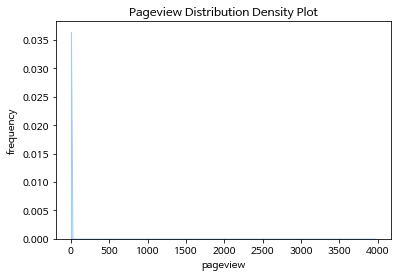

In [130]:
sns.kdeplot(base['pageview'], shade=True)
plt.xlabel('pageview')
plt.ylabel('frequency')
plt.title('Pageview Distribution Density Plot')
plt.show()

#### 일별 URL별 총 unique한 IP 수 (총 고객 수)

In [131]:
base['customer'].unique()

array([   1,    2,    4,    3,    5,   26,   20,   18,   22,   12,    6,
          7,   24,   40,   16,    9,   21,    8,   10,   41,   38,   11,
         13,   17,   14,   25,   19,   32,   27,   48,   81,   23,   36,
         39,   65,   29,   30,   35,   67,   52,   43,   15,   37,   44,
         71,   45,   77,   33,   66,   50,   31,   34,   28,   68,   46,
         53,   72,   58,   42,   70,   59,   51,   69,  102,   84,   63,
         62,   49,   75,   47,   61,   74,   64,   56,   60,   57,   90,
         54,   82,   89,   79,   55,   86,   76,   91,   83,   88,   92,
         73,   80,   93,   97,   98,  194,   85,   94,   87,   78,  109,
        425,  277,   96,  119,  188,  173,  141,  216,  490,  802,  806,
        132,  113,  597,  324,  105,  142,  157,  111,  103,  100,   95,
       1029, 1266,  136,  144,  108,  757,  467,  881,  790,  340,  106,
        150,  101,  345,  110,  104,  123,  234,  172,  107,  171,  635])

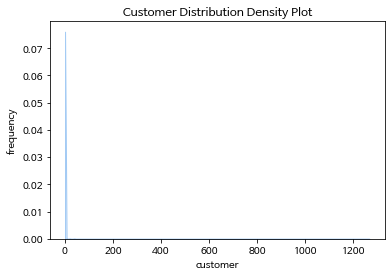

In [132]:
sns.kdeplot(base['customer'], shade=True)
plt.xlabel('customer')
plt.ylabel('frequency')
plt.title('Customer Distribution Density Plot')
plt.show()

#### 일자별 URL별 페이지뷰와 실제 고객/방문자 수의 차이 
- 인사이트
    - 해당 URL에 실제 고객 수는 적지만, 페이지뷰가 높음 -> 해당 URL의 어떤 요소들이 일회성으로 그 페이지에 많이 등장하는지, 그리고 어떻게 하면 실제 고객을 높일 수 있을지 구체적인 방안 수립
    - 해당 URL에 페이지뷰는 적지만 실제 고객 수가 높음 -> ???

# 전체 방문자 (분류 없이)

## 1. (그날의 IP - New IP)방문자 분석

인당
- pageview:groupby('New ID').count()
- Unique pageview: groupby('New ID')[URL].nunique()

Total Day
- pageview: 
- Unique pageview: 

#### 시간요소별 방문자 수 

In [76]:
def time(df):
    # 월별 
    monthly_counts = df.groupby(df['Timestamp'].dt.month)['New IP'].nunique()  
    
    # 계절별
    #seasons = ['winter', 'spring', 'summer', 'autumn']
    #season_counts = df.groupby(df['Timestamp'].dt.quarter)['New IP'].nunique().reindex([1, 2, 3, 4], fill_value=0)
    #season_counts.index = seasons
    
    # 주별
    weekly_counts = df.groupby(df['Timestamp'].dt.isocalendar().week)['New IP'].nunique()
    
    # 요일별 New IP count
    day_counts = df.groupby(df['Timestamp'].dt.weekday)['New IP'].nunique()
    day_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # 시간대별 New IP count
    hourly_counts = df.groupby(df['Timestamp'].dt.hour)['New IP'].nunique()
    
    return monthly_counts, season_counts, weekly_counts, day_counts, hourly_counts

In [77]:
# 함수 호출
monthly_counts, season_counts, weekly_counts, day_counts, hourly_counts = time(data)

# 결과 출력
print("월별:\n", monthly_counts)
print("\n계절별:\n", season_counts)
print("\n주별:\n", weekly_counts)
print("\n요일별:\n", day_counts)
print("\n시간대별:\n", hourly_counts)

월별:
 Timestamp
1     134563
2      85046
3      95229
4      84989
5     102325
6      85325
7      66833
8      75850
9      66850
10     73194
11     74559
12     98934
Name: New IP, dtype: int64

계절별:
 winter    314838
spring    272639
summer    209533
autumn    246687
Name: New IP, dtype: int64

주별:
 week
1     22489
2     46714
3     32739
4     22789
5     22681
6     23433
7     20882
8     19049
9     20366
10    22924
11    22184
12    20437
13    20221
14    20445
15    20964
16    21481
17    17344
18    16175
19    22391
20    27633
21    27424
22    19417
23    18237
24    22229
25    19189
26    19066
27    16773
28    15307
29    15782
30    13180
31    18959
32    18894
33    14776
34    17066
35    15499
36    12856
37    16803
38    16126
39    17509
40    16968
41    16341
42    17216
43    15645
44    16393
45    17233
46    17040
47    18208
48    18835
49    24022
50    24484
51    21082
52    21797
Name: New IP, dtype: int64

요일별:
 Monday       160772
Tuesday    

In [90]:
#테이블 저장 
month = pd.DataFrame(monthly_counts)
season = pd.DataFrame(season_counts)
week = pd.DataFrame(weekly_counts)
day = pd.DataFrame(day_counts)
hour = pd.DataFrame(hourly_counts)

month.to_csv("1_month_all.csv", index=False)
season.to_csv("1_season_all.csv", index=False)
week.to_csv("1_week_all.csv", index=False)
day.to_csv("1_day_all.csv", index=False)
hour.to_csv("1_hour_all.csv", index=False)

In [81]:
#그래프 확인 
sns.set_palette('pastel')

def plot1(dataframe, condition):
    """
    조건에 따라 New IP 수를 플롯하는 함수

    Parameters:
        dataframe (pd.DataFrame): 데이터프레임
        condition (str): 'month', 'season', 'week', 'day', 'weekday', 'hour' 중 하나

    Returns:
        None
    """
    # 조건에 따라 데이터를 그룹화하고 New IP 수를 계산
    if condition == 'month':
        grouped = dataframe.groupby(dataframe['Timestamp'].dt.month)['New IP'].nunique()
        x_label = '월'
    elif condition == 'season':
        # 계절을 나타내는 열을 추가 (예: 봄, 여름, 가을, 겨울)
        dataframe['Season'] = (dataframe['Timestamp'].dt.month % 12 + 3) // 3
        season_mapping = {1: '겨울', 2: '봄', 3: '여름', 4: '가을'}
        grouped = dataframe.groupby('Season')['New IP'].nunique()
        grouped.index = grouped.index.map(season_mapping)
        x_label = '계절'
    elif condition == 'week':
        grouped = dataframe.groupby(dataframe['Timestamp'].dt.isocalendar().week)['New IP'].nunique()
        x_label = '주'
    elif condition == 'weekday':
        weekday_mapping = {
            0: '월요일', 1: '화요일', 2: '수요일',
            3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'
        }
        grouped = dataframe.groupby(dataframe['Timestamp'].dt.weekday)['New IP'].nunique()
        grouped.index = grouped.index.map(weekday_mapping)
        x_label = '요일'
    elif condition == 'hour':
        grouped = dataframe.groupby(dataframe['Timestamp'].dt.hour)['New IP'].nunique()
        x_label = '시간대'
    else:
        print("Invalid condition")
        return

    # 플롯 그리기
    plt.figure(figsize=(10, 5))
    plt.bar(grouped.index, grouped.values)
    plt.xlabel(x_label)
    plt.ylabel('방문자 수')
    plt.title(f'{x_label}별 방문자 수')
    plt.show()

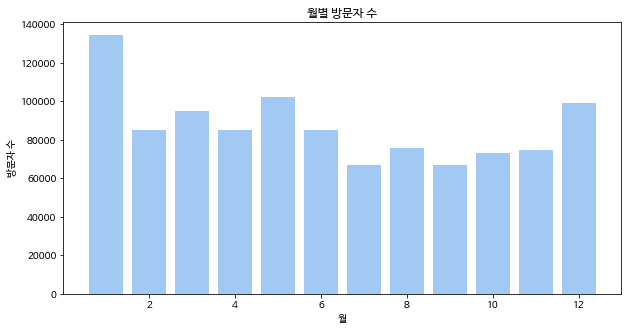

In [82]:
plot1(data, 'month')

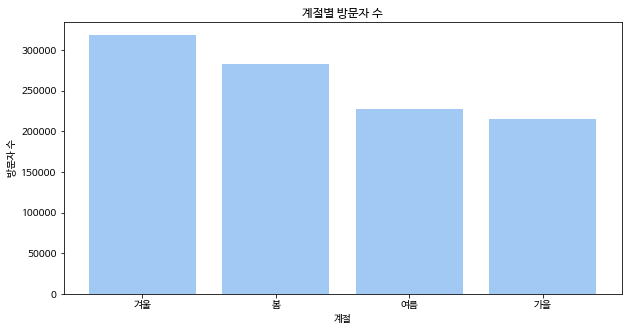

In [83]:
plot1(data, 'season')

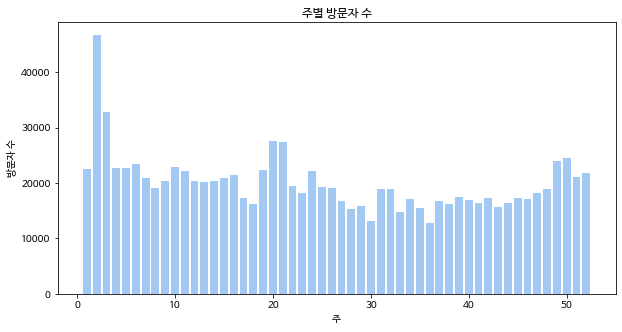

In [85]:
plot1(data, 'week')

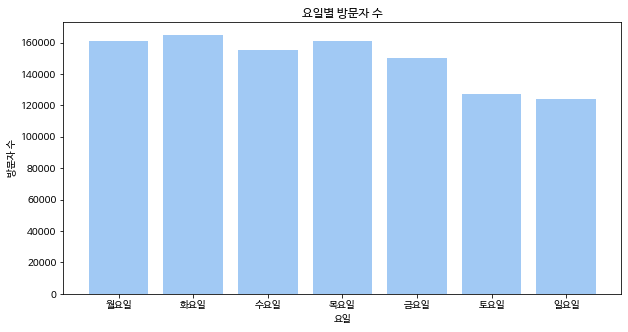

In [86]:
plot1(data, 'weekday')

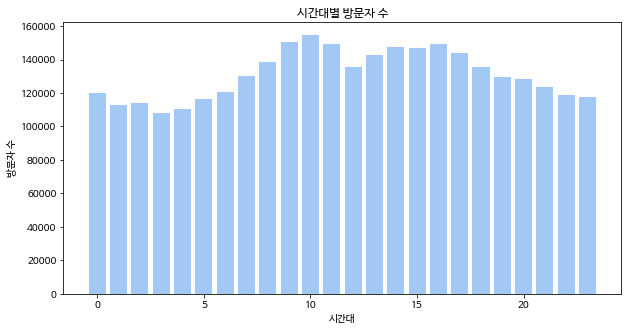

In [87]:
plot1(data, 'hour')

#### 방문자별 사이트 내 이동 수 (=New IP별 URL 수)

In [93]:
url = data.groupby('New IP')['URL'].nunique().reset_index()
url = pd.DataFrame(url)
url.head()

,New IP,URL
0,1,2
1,2,5
2,3,4
3,4,1
4,5,1


In [95]:
#테이블 저장 
url.to_csv("1_urlcount_all.csv", index=False)

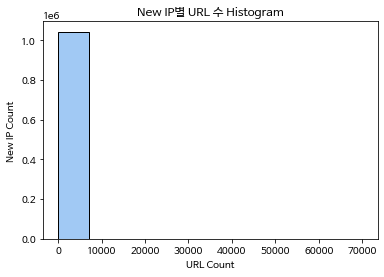

In [146]:
#그래프 확인 
plt.hist(url['URL'], bins=10, edgecolor='k')
plt.xlabel('URL Count')
plt.ylabel('New IP Count')
plt.title('New IP별 URL 수 Histogram')
plt.show()

- **시간요소별 방문자(New IP)별 사이트 내 평균 이동 수(URL 수)**

In [106]:
def time_url(df):
    # 월별 New IP별 평균 URL 수 데이터프레임 출력
    monthly_means = df.groupby([df['Timestamp'].dt.strftime('%Y-%m'), 'New IP'])['URL'].nunique().reset_index()
    monthly_means = monthly_means.groupby('Timestamp')['URL'].mean().reset_index()
    
    # 계절별 New IP별 평균 URL 수 데이터프레임 출력
    seasons = ['winter', 'spring', 'summer', 'autumn']
    season_means = df.groupby([df['Timestamp'].dt.quarter, 'New IP'])['URL'].nunique().reset_index()
    season_means['Timestamp'] = season_means['Timestamp'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'autumn'})
    season_means = season_means.groupby('Timestamp')['URL'].mean().reset_index()
    
    # 주별 New IP별 평균 URL 수 데이터프레임 출력
    weekly_means = df.groupby([df['Timestamp'].dt.strftime('%Y-%U'), 'New IP'])['URL'].nunique().reset_index()
    weekly_means = weekly_means.groupby('Timestamp')['URL'].mean().reset_index()
    
    # 요일별 New IP별 평균 URL 수 데이터프레임 출력
    day_means = df.groupby([df['Timestamp'].dt.strftime('%A'), 'New IP'])['URL'].nunique().reset_index()
    day_means = day_means.groupby('Timestamp')['URL'].mean().reset_index()
    
    # 시간대별 New IP별 평균 URL 수 데이터프레임 출력
    hourly_means = df.groupby([df['Timestamp'].dt.hour, 'New IP'])['URL'].nunique().reset_index()
    hourly_means = hourly_means.groupby('Timestamp')['URL'].mean().reset_index()
    
    return monthly_means, season_means, weekly_means, day_means, hourly_means

In [109]:
# 함수 호출
monthly_means, season_means, weekly_means, day_means, hourly_means = time_url(data)

# 결과 출력
print("월별 New IP별 평균 URL 수:\n", monthly_means)
print("\n계절별 New IP별 평균 URL 수:\n", season_means)
print("\n주별 New IP별 평균 URL 수:\n", weekly_means)
print("\n요일별 New IP별 평균 URL 수:\n", day_means)
print("\n시간대별 New IP별 평균 URL 수:\n", hourly_means)

월별 New IP별 평균 URL 수:
    Timestamp        URL
0    2022-08  15.312419
1    2022-09  19.560209
2    2022-10  11.844782
3    2022-11  12.244397
4    2022-12  10.268290
5    2023-01   8.364001
6    2023-02   9.813713
7    2023-03  11.543605
8    2023-04  16.022191
9    2023-05  10.410193
10   2023-06  13.467964
11   2023-07  12.458576

계절별 New IP별 평균 URL 수:
   Timestamp        URL
0    autumn  11.333309
1    spring  13.116564
2    summer  15.757380
3    winter   9.717340

주별 New IP별 평균 URL 수:
    Timestamp        URL
0    2022-31  13.907101
1    2022-32  10.747517
2    2022-33  14.784487
3    2022-34  24.176647
4    2022-35  13.536938
5    2022-36  44.130806
6    2022-37  16.027431
7    2022-38   9.729473
8    2022-39  14.409825
9    2022-40  12.888478
10   2022-41  13.314331
11   2022-42  12.395518
12   2022-43   9.449829
13   2022-44  10.474852
14   2022-45  10.339125
15   2022-46  12.538819
16   2022-47  12.671336
17   2022-48  12.338069
18   2022-49  13.139587
19   2022-50   8.887955


In [112]:
#테이블 저장 
month_url = pd.DataFrame(monthly_means)
season_url = pd.DataFrame(season_means)
week_url = pd.DataFrame(weekly_means)
day_url = pd.DataFrame(day_means)
hour_url = pd.DataFrame(hourly_means)

month_url.to_csv("1_month_url_all.csv", index=False)
season_url.to_csv("1_season_url_all.csv", index=False)
week_url.to_csv("1_week_url_all.csv", index=False)
day_url.to_csv("1_day_url_all.csv", index=False)
hour_url.to_csv("1_hour_url_all.csv", index=False)

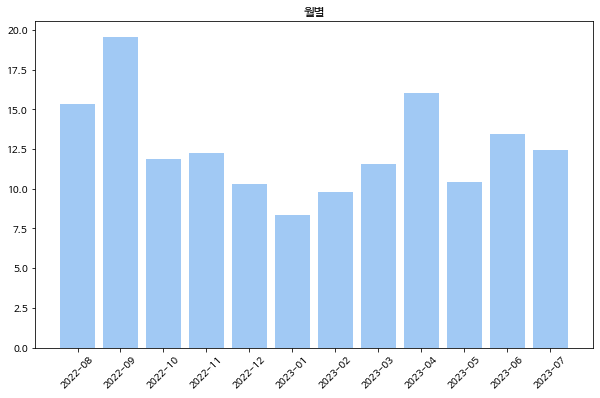

In [116]:
#그래프 확인 
plt.figure(figsize=(10, 6))
plt.bar(month_url['Timestamp'], month_url['URL'])
plt.title('월별')  
plt.xticks(rotation=45) 
plt.show()

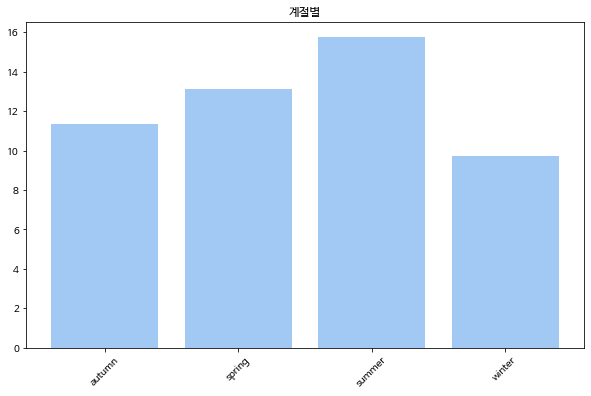

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(season_url['Timestamp'], season_url['URL'])
plt.title('계절별')  
plt.xticks(rotation=45) 
plt.show()

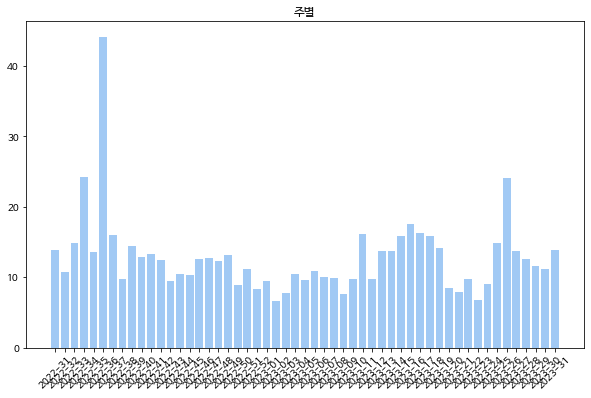

In [123]:
plt.figure(figsize=(10, 6))
plt.bar(week_url['Timestamp'], week_url['URL'])
plt.title('주별')  
plt.xticks(rotation=45) 
plt.show()

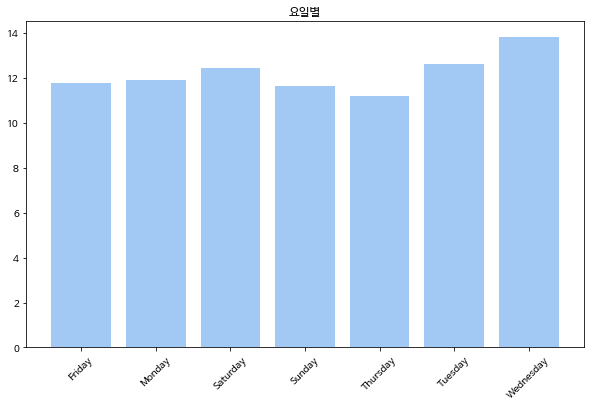

In [124]:
plt.figure(figsize=(10, 6))
plt.bar(day_url['Timestamp'], day_url['URL'])
plt.title('요일별')  
plt.xticks(rotation=45) 
plt.show()

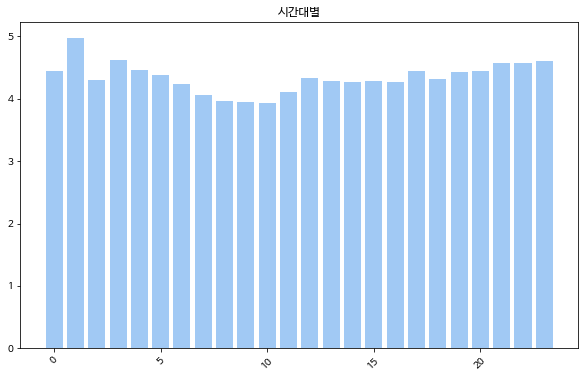

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(hour_url['Timestamp'], hour_url['URL'])
plt.title('시간대별')  
plt.xticks(rotation=45) 
plt.show()

#### 방문자별 평균 접속시간 (=New IP별 Duration)

In [133]:
duration

,New IP,Duration
0,543,0 days 11:55:53
1,250,0 days 13:42:55
2,1093,0 days 09:29:00
3,1094,0 days 09:22:25
4,528,0 days 12:28:37
...,...,...
1043692,1043650,0 days 00:00:00
1043693,1043646,0 days 00:00:00
1043694,1042177,0 days 00:00:00
1043695,1042272,0 days 00:00:00


In [139]:
duration['Duration'] = pd.to_timedelta(duration['Duration']) 
result = duration.groupby('New IP')['Duration'].mean().reset_index()
avg_duration = pd.DataFrame(result)
avg_duration['Duration'] = avg_duration['Duration'].dt.total_seconds() / 3600
avg_duration

,New IP,Duration
0,1,0.001111
1,2,0.049722
2,3,0.005556
3,4,0.000000
4,5,0.000000
...,...,...
1043692,1043693,0.000000
1043693,1043694,0.000000
1043694,1043695,0.000000
1043695,1043696,7.365000


In [152]:
avg_duration.to_csv("1_avg_duration_all.csv", index=False)

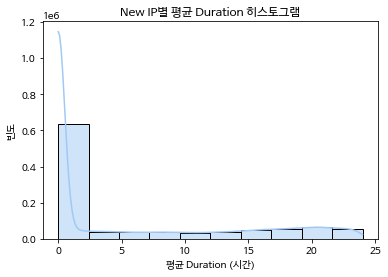

In [151]:
#그래프 확인
sns.histplot(avg_duration['Duration'], bins=10, kde='True')
plt.xlabel('평균 Duration (시간)')
plt.ylabel('빈도')
plt.title('New IP별 평균 Duration 히스토그램')
plt.show()

## 2. 카테고리별 페이지뷰 분석 

**시간요소별 카테고리별 페이지뷰(=IP 총 수)**

In [127]:
def time_cat(df):
    # 월별 New IP별 평균 URL 수 데이터프레임 출력
    monthly_cat = df.groupby([df['Timestamp'].dt.strftime('%Y-%m'), 'Category'])["IP"].count().reset_index()
    
    # 계절별 New IP별 평균 URL 수 데이터프레임 출력
    season_cat = df.groupby([df['Timestamp'].dt.quarter, 'Category'])["IP"].count().reset_index()
    season_cat['Timestamp'] = season_cat['Timestamp'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'autumn'})
    
    # 주별 New IP별 평균 URL 수 데이터프레임 출력
    weekly_cat = df.groupby([df['Timestamp'].dt.strftime('%Y-%U'), 'Category'])["IP"].count().reset_index()
    
    # 요일별 New IP별 평균 URL 수 데이터프레임 출력
    day_cat = df.groupby([df['Timestamp'].dt.strftime('%A'), 'Category'])["IP"].count().reset_index()
    
    # 시간대별 New IP별 평균 URL 수 데이터프레임 출력
    hourly_cat = df.groupby([df['Timestamp'].dt.hour, 'Category'])["IP"].count().reset_index()
    
    return monthly_cat, season_cat, weekly_cat, day_cat, hourly_cat

In [128]:
# 함수 호출
monthly_cat, season_cat, weekly_cat, day_cat, hourly_cat = time_cat(data)

# 결과 출력
print("월별 New IP별 평균 URL 수:\n", monthly_cat)
print("\n계절별 New IP별 평균 URL 수:\n", season_cat)
print("\n주별 New IP별 평균 URL 수:\n", weekly_cat)
print("\n요일별 New IP별 평균 URL 수:\n", day_cat)
print("\n시간대별 New IP별 평균 URL 수:\n", hourly_cat)

월별 New IP별 평균 URL 수:
     Timestamp             Category      IP
0     2022-08               banner   11208
1     2022-08                 help   41426
2     2022-08                 jobs  156110
3     2022-08             magazine   81824
4     2022-08                 main    2354
..        ...                  ...     ...
187   2023-07  mobile social media    1063
188   2023-07                 news  346929
189   2023-07               photos  106496
190   2023-07               search   26998
191   2023-07         social media   28967

[192 rows x 3 columns]

계절별 New IP별 평균 URL 수:
    Timestamp             Category       IP
0     winter               banner    48312
1     winter                 help    69030
2     winter                 jobs   530899
3     winter             magazine   199607
4     winter                 main     6501
..       ...                  ...      ...
59    autumn  mobile social media    10237
60    autumn                 news  1088257
61    autumn               

In [153]:
#테이블 저장 
month_cat = pd.DataFrame(monthly_cat)
season_cat = pd.DataFrame(season_cat)
week_cat = pd.DataFrame(weekly_cat)
day_cat = pd.DataFrame(day_cat)
hour_cat = pd.DataFrame(hourly_cat)

month_cat.to_csv("1_month_cat_all.csv", index=False)
season_cat.to_csv("1_season_cat_all.csv", index=False)
week_cat.to_csv("1_week_cat_all.csv", index=False)
day_cat.to_csv("1_day_cat_all.csv", index=False)
hour_cat.to_csv("1_hour_cat_all.csv", index=False)

In [154]:
month_cat

,Timestamp,Category,IP
0,2022-08,banner,11208
1,2022-08,help,41426
2,2022-08,jobs,156110
3,2022-08,magazine,81824
4,2022-08,main,2354
...,...,...,...
187,2023-07,mobile social media,1063
188,2023-07,news,346929
189,2023-07,photos,106496
190,2023-07,search,26998


<Figure size 1152x576 with 0 Axes>

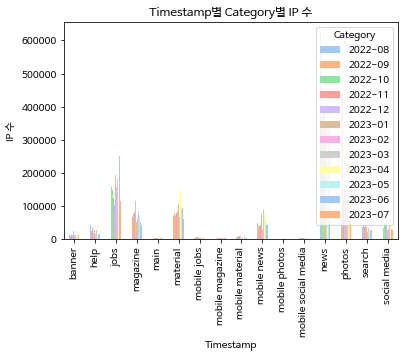

In [163]:
#그래프 확인
grouped = month_cat.groupby(['Timestamp', 'Category'])['IP'].sum().unstack().T
plt.figure(figsize=(16, 8))  
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Timestamp')
plt.ylabel('IP 수')
plt.title('Timestamp별 Category별 IP 수')
plt.legend(title='Category', loc='upper right')
plt.show()

# <외부 접속자>

## 3. 사이트 접속 과정 중 검색 단어 키워드 분석 

현재 데이터에 Referer Search Word 없어서 일단 보류

## 4. 방문자 접속 경로 분석